# DEA accredited projects analysis 2019-2025

## Strategic context
The UK government has started positioning high-quality data as critical national infrastructure, investing over £100 million in the ADR UK program alone since 2018, and with the Digital Economy Act 2017 (DEA) creating unprecedented opportunities for streamlined access to survey and administrative datasets for research in the public good. As large-scale, linked public sector data becomes increasingly important evidence-based policymaking, particularly for complex and crosds-cutting challenges like productivity gaps and social and health inequalities, understanding how this investment translates into impact is crucial. 

Public funders need evidence that flagship datasets deliver research impact that justifies their development costs, helping identify which data assets generate the highest returns and where future resources should be concentrated. Simultaneously, tracking the evolution of research themes provides early intelligence on emerging policy challenges and scientific opportunities, ensuring infrastructure keeps pace with researcher demand. With research access requests under the DEA steadily increasing, uunderstanding demand trajectories is also critical for capacity planning, from project approvals to the secure environments that enable data access, so that infrastructure does not become a bottleneck to the very research it was designed to support.

## Aims of the project 
Understanding data usage patterns is critical for informing government investment in data infrastructure and ensuring publicly-funded infrastructure meet researcher and policy needs.
This analysis aims to help understand how publically-funded data infrastructure is supporting public policy research, what the relative demand for different sensitive datasets is, and how research interests using this data have evolved over time

### Part 1: Quantifying dataset usage in DEA-accredited research
- Measure how many research projects have been approved under the DEA since the public register of projects began (Q4 2019).
- Track which datasets have been requested most often, and how this has evolved over time.
- Focus on the use of ADR UK flagship datasets, assessing both their uptake and growth across quarters.

### Part 2: Understanding shifts in research focus over time
- Use text analysis of project titles to identify dominant themes in research.
- Track emerging and declining research topics using frequency and TF-IDF metrics.
- Provide visual summaries to show how topic focus has changed over time.

## Approach:

### Part 1: Dataset access trends
(All code available on [github](https://github.com/balintstewart77/ADR_DEA_project)), main project notebook [here](https://github.com/balintstewart77/ADR_DEA_project/blob/main/analysis/DEA_projects_analysis.ipynb)
- Scraped and cleaned public data on all research projects approved under the DEA from 2019 onward: [UK Statistics Authority website](https://uksa.statisticsauthority.gov.uk/digitaleconomyact-research-statistics/better-useofdata-for-research-information-for-researchers/list-of-accredited-researchers-and-research-projects-under-the-research-strand-of-the-digital-economy-act/)
- Filtered to exclude projects under a different legal gateway (SRSA 2007 - a gateway limited to research for purely statistical purposes) to ensure a focus on Digital Economy Act approved-research. 
- Categorised datasets and grouped some into collections (e.g., “Data First” and “Wage and Employment Dynamics”) for clarity.
- Visualised the growth in use of ADR UK flagship datasets, quarter by quarter.
- Calculated compounded growth rates for each flagship dataset collection.
- Created summary tables showing trends and growth over time, which can be easily copied into reports.

### Part 2: Topic trends in research 
- Analysed the titles of research projects to understand what topics are being studied.
- Applied natural language processing to clean and process this text data.
- Used TF-IDF scoring to identify the most distinctive keywords per year or quarter.
- Tracked which terms are growing or declining in usage across time.
- Presented topic trends visually via word clouds and line charts.

## Summary of findings
### Part 1: Dataset access trends
**Overall Dataset Popularity**
- Over 1000 projects have been approved under the DEA between 2019 and 14 May 2025.
- The Business Structure Database (220 requests), Annual Business Survey (191 requests) and the Annual Survey of Hours and Earnings (158) are the three most frequently requested datasets in these projects.

**ADR UK Flagship Datasets**
- The number of requests for ADR UK flagship datasets **more than quadrupled** from 20 in 2021 to 89 in 2024 (growth rate of 345%).
- This equates to a **doubling in the use of flagship datasets around every 1.5 years** on average over the observed annual time period.

The demand for these datasets can be split into roughly 3 phases:
- **2021-2022: Foundation phase**. Started with 20 requests in 2021, saw 40% growth in access requests in year two
- **2023: Breakthrough year**. Saw 57% growth, reaching 44 projects in that year and much better consistency in access requests - volatility fell from 84% (2021 coefficient of variation = 0.84) to 26% (2023 coefficient of variation = 0.26)
- **2024: Acceleration phase**. Doubling of requersts for flagship datasets to 89, with the steady quarterly growth (11 → 21 → 26 → 31 access requests) maintained into Q1 of 2025 (37 access requests)

- The Longitudinal Education Outcomes (LEO) and Data First collections are the most accessed flagship datasets overall.
- ECHILD shows the most rapid growth in use among flagship dataset collections.


### Part 2: Topic trends in research 
- Research themes across all DEA accredited projects over the past 6 years can be split very broadly into four clusters:
    - Cluster 1: Business, growth, and productivity; 
    - Cluster 2: Gender and ethnic inequalities and gaps, 
    - Cluster 3: Health, social and children;
    - Cluster 4: Labour market, skills and education terms.
- An analysis on the change in the use of terms showed:
    - some terms like 'labour', 'market', 'employment' and 'productivity' remain reasonably consistent in project titles over time 
    - others like 'health' and 'education' steadily growing
    - appearance of other terms like 'covid19' have fallen dramatically in project titles in recent years

In [86]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from scipy import stats

In [53]:
df = pd.read_csv('C:/Users/balin/Desktop/ADR_DEA_project/data/dea_accredited_projects.csv')

In [54]:
df.head()

,Project ID,Title,Researchers,Legal Basis,Datasets Used,Secure Research Service,Accreditation Date
0,2019/003,The fall of the labour share and rise of the s...,"Carolin Ioramashvili, London School of Economics",Digital Economy Act (2017),Office for National Statistics: Annual Respond...,Office for National Statistics Secure Research...,10/25/2019
1,2019/004,The changing nature of the HR and training pra...,"Jonathan Boys, Chartered Institute of Personne...",Digital Economy Act (2017),Office for National Statistics: Annual Populat...,Office for National Statistics Secure Research...,10/25/2019
2,2019/006,Analysis of victimisation data from the Crime ...,"Julian Molina, Office of the Victims' Commissi...",Digital Economy Act (2017),Office for National Statistics: Crime Survey f...,Office for National Statistics Secure Research...,10/14/2019
3,2019/007,Thriving Places index – indicators of wellbein...,"Soraya Safazadeh, Happy City Initiative\nSaama...",Digital Economy Act (2017),Office for National Statistics: Labour Force S...,Office for National Statistics Secure Research...,10/14/2019
4,2019/008,Class in UK creative industries: Beyond partic...,"Rebecca Florisson, The Work Foundation",Digital Economy Act (2017),Office for National Statistics: Labour Force S...,Office for National Statistics Secure Research...,11/19/2019


In [55]:
df.isna().sum()

Project ID                 0
Title                      0
Researchers                2
Legal Basis                0
Datasets Used              1
Secure Research Service    0
Accreditation Date         0
dtype: int64

In [56]:
missing_researchers = df[df['Researchers'].isna()]

In [57]:
missing_datasets = df[df['Datasets Used'].isna()]

In [58]:
# Drop rows with missing datasets used
df = df.dropna(subset=['Datasets Used'])

In [59]:
df.head()

,Project ID,Title,Researchers,Legal Basis,Datasets Used,Secure Research Service,Accreditation Date
0,2019/003,The fall of the labour share and rise of the s...,"Carolin Ioramashvili, London School of Economics",Digital Economy Act (2017),Office for National Statistics: Annual Respond...,Office for National Statistics Secure Research...,10/25/2019
1,2019/004,The changing nature of the HR and training pra...,"Jonathan Boys, Chartered Institute of Personne...",Digital Economy Act (2017),Office for National Statistics: Annual Populat...,Office for National Statistics Secure Research...,10/25/2019
2,2019/006,Analysis of victimisation data from the Crime ...,"Julian Molina, Office of the Victims' Commissi...",Digital Economy Act (2017),Office for National Statistics: Crime Survey f...,Office for National Statistics Secure Research...,10/14/2019
3,2019/007,Thriving Places index – indicators of wellbein...,"Soraya Safazadeh, Happy City Initiative\nSaama...",Digital Economy Act (2017),Office for National Statistics: Labour Force S...,Office for National Statistics Secure Research...,10/14/2019
4,2019/008,Class in UK creative industries: Beyond partic...,"Rebecca Florisson, The Work Foundation",Digital Economy Act (2017),Office for National Statistics: Labour Force S...,Office for National Statistics Secure Research...,11/19/2019


In [60]:
df['Legal Basis'].value_counts()

Legal Basis
Digital Economy Act (2017)                                                                                                                                                                                                                                                       1023
Statistics and Registration Services Act 2007 (SRSA) - Approved Researcher Gateway: added data after 9 September 2021                                                                                                                                                              98
Digital Economy Act 2017                                                                                                                                                                                                                                                           18
Statistics and Registration Services Act 2007 (SRSA) - Approved Researcher Gateway: added data after 9 September 2021s Act 2007 (SRSA) - Approved Research

In [61]:
# Clean Legal Basis column by removing SRSA rows
df = df[~df['Legal Basis'].str.contains('SRSA', na=False)]
# tidy up DEA labels
df['Legal Basis'] = df['Legal Basis'].str.replace('Digital Economy Act (2017)', 'Digital Economy Act 2017')
df['Legal Basis'].value_counts()

Legal Basis
Digital Economy Act 2017    1041
Name: count, dtype: int64

- Over 1000 projects have been approved under the DEA between 2019 and 2025, applying for access to use an overall total of >2800 datasets 

In [62]:
df.isna().sum()

Project ID                 0
Title                      0
Researchers                2
Legal Basis                0
Datasets Used              0
Secure Research Service    0
Accreditation Date         0
dtype: int64

In [63]:
problematic_dates = df[pd.isna(pd.to_datetime(df['Accreditation Date'], errors='coerce'))]
print(problematic_dates['Accreditation Date'].unique())

['2020-06-11' '2020-12-07' '2021-11-02' '2021-09-14' '2021-09-24'
 '2021-09-17' '2021-10-05' '2021-10-13' '2021-10-26' '2021-10-12'
 '2021-12-10' '2021-03-15' '2023-01-18' '2023-03-06' '2023-03-09'
 '2023-01-03' '2023-04-05' '2023-01-30' '2023-01-17' '2023-04-19'
 '2023-01-20' '2023-02-03' '2023-01-19' '2023-03-02' '2023-03-05'
 '2023-03-21' '2023-04-11' '2023-03-31' '2023-01-11' '2023-03-07'
 '2023-04-04' '2023-02-10' '2023-01-04' '2023-03-20' '2023-01-23'
 '2023-03-03' '2023-02-16' '2023-02-07' '2023-03-23' '2023-02-13'
 '2023-02-24' '2023-04-18' '2023-02-15' '2023-01-22' '2023-03-27'
 '2023-02-22' '2023-01-06' '2023-04-13' '2023-01-13' '2023-01-16'
 '2023-02-02' '2023-03-08' '2023-04-06' '2023-03-24' '2023-03-30'
 '2023-05-02' '2023-05-09' '2023-05-24' '2023-06-02' '2023-06-07'
 '2023-06-13' '2023-06-19' '2023-06-20' '2023-06-22' '2023-05-12'
 '2023-06-05' '13/07/2023' '28/07/2023' '31/07/2023' '17/08/2023'
 '18/08/2023' '30/08/2023' '18/09/2023' '19/09/2023' '20/09/2023'
 '27/09/20

In [64]:
def parse_mixed_dates(date_str):
    """Parse dates that could be in YYYY-MM-DD or DD/MM/YYYY format"""
    if pd.isna(date_str):
        return pd.NaT
    
    date_str = str(date_str).strip()
    
    # Try ISO format first (YYYY-MM-DD)
    if '-' in date_str:
        try:
            return pd.to_datetime(date_str, format='%Y-%m-%d')
        except:
            pass
    
    # Try DD/MM/YYYY format
    if '/' in date_str:
        try:
            return pd.to_datetime(date_str, format='%d/%m/%Y')
        except:
            pass
    
    # Fallback to pandas inference
    try:
        return pd.to_datetime(date_str)
    except:
        return pd.NaT

# Apply the custom parser
df['Accreditation Date'] = df['Accreditation Date'].apply(parse_mixed_dates)

# Create quarter and year columns
df['Accreditation Date Quarter'] = df['Accreditation Date'].dt.to_period('Q')
df['Accreditation Date Year'] = df['Accreditation Date'].dt.year
df['quarter_date'] = df['Accreditation Date Quarter'].dt.to_timestamp(how='start')
df['Quarter Label'] = df['Accreditation Date Quarter'].apply(
    lambda p: f"Q{p.quarter} {p.year}" if pd.notna(p) else None
)

# Check for any remaining problematic dates
remaining_nans = df[df['Accreditation Date'].isna()]
print(f"Remaining NaN dates: {len(remaining_nans)}")
if len(remaining_nans) > 0:
    print("Original values that couldn't be parsed:")
    print(remaining_nans['Accreditation Date'].unique())

Remaining NaN dates: 0


In [65]:
df.isna().sum()

Project ID                    0
Title                         0
Researchers                   2
Legal Basis                   0
Datasets Used                 0
Secure Research Service       0
Accreditation Date            0
Accreditation Date Quarter    0
Accreditation Date Year       0
quarter_date                  0
Quarter Label                 0
dtype: int64

In [66]:
# Dataset has single entry in 2019Q1, likely a typo (rest of data starts from 2019Q4), fix manually
df.loc[16, 'Accreditation Date Quarter'] = '2019Q4'

In [67]:
import re

def extract_datasets(row):
    """
    Extract dataset names from the 'Datasets Used' column.
    Handles multiple data sources and newlines, but doesn't filter values.
    """
    if pd.isna(row) or row == "":
        return []
    
    # Replace newlines and normalize other separators
    processed = row.replace("\n", ";").replace("\\n", ";")
    
    results = []
    
    # Split by semicolons to handle multiple data sources
    for entry in processed.split(";"):
        entry = entry.strip()
        if not entry:
            continue
        
        # Handle the case with or without a data source (colon)
        if ":" in entry:
            # Split only on the first colon
            parts = entry.split(":", 1)
            datasets = parts[1].strip()
            
            # Skip if there's nothing after the colon
            if not datasets:
                continue
        else:
            datasets = entry
        
        # Split by commas and process each dataset
        for ds in datasets.split(","):
            ds = ds.strip()
            
            # Only skip empty strings
            if not ds:
                continue
            
            results.append(ds)
    
    return results

In [68]:
# lowercase the datasets used column
df["datasets_clean"] = df["Datasets Used"].str.lower()

# apply the function to create a list of dataset names
df["dataset_list"] = df["datasets_clean"].apply(lambda x: extract_datasets(x) if pd.notnull(x) else [])

# explode the dataset list to one dataset per row
df_exploded = df.explode("dataset_list")



In [69]:
df_exploded[df_exploded['Datasets Used'].str.contains("PAYE")]

,Project ID,Title,Researchers,Legal Basis,Datasets Used,Secure Research Service,Accreditation Date,Accreditation Date Quarter,Accreditation Date Year,quarter_date,Quarter Label,datasets_clean,dataset_list
1032,2024/239,Uncovering Patterns and Policy Implications of...,"Darja Reuschke, University of Birmingham",Digital Economy Act 2017,"Office for National Statistics, HM Revenue & C...",Office for National Statistics Secure Research...,2024-12-16,2024Q4,2024,2024-10-01,Q4 2024,"office for national statistics, hm revenue & c...",annual survey of hours and earnings linked to ...
1076,2025/028,ESCoE P6.S1 Project: Development of the UK Lab...,"Mechelle Viernes, King's College London\nMary ...",Digital Economy Act 2017,Office for National Statistics: Annual Busines...,Office for National Statistics Secure Research...,2025-02-07,2025Q1,2025,2025-01-01,Q1 2025,office for national statistics: annual busines...,annual business survey - gb
1076,2025/028,ESCoE P6.S1 Project: Development of the UK Lab...,"Mechelle Viernes, King's College London\nMary ...",Digital Economy Act 2017,Office for National Statistics: Annual Busines...,Office for National Statistics Secure Research...,2025-02-07,2025Q1,2025,2025-01-01,Q1 2025,office for national statistics: annual busines...,business register employment survey - uk
1076,2025/028,ESCoE P6.S1 Project: Development of the UK Lab...,"Mechelle Viernes, King's College London\nMary ...",Digital Economy Act 2017,Office for National Statistics: Annual Busines...,Office for National Statistics Secure Research...,2025-02-07,2025Q1,2025,2025-01-01,Q1 2025,office for national statistics: annual busines...,labour force survey person - uk
1076,2025/028,ESCoE P6.S1 Project: Development of the UK Lab...,"Mechelle Viernes, King's College London\nMary ...",Digital Economy Act 2017,Office for National Statistics: Annual Busines...,Office for National Statistics Secure Research...,2025-02-07,2025Q1,2025,2025-01-01,Q1 2025,office for national statistics: annual busines...,labour force survey household - uk
1076,2025/028,ESCoE P6.S1 Project: Development of the UK Lab...,"Mechelle Viernes, King's College London\nMary ...",Digital Economy Act 2017,Office for National Statistics: Annual Busines...,Office for National Statistics Secure Research...,2025-02-07,2025Q1,2025,2025-01-01,Q1 2025,office for national statistics: annual busines...,monthly wages and salary survey - great britain
1076,2025/028,ESCoE P6.S1 Project: Development of the UK Lab...,"Mechelle Viernes, King's College London\nMary ...",Digital Economy Act 2017,Office for National Statistics: Annual Busines...,Office for National Statistics Secure Research...,2025-02-07,2025Q1,2025,2025-01-01,Q1 2025,office for national statistics: annual busines...,online time use survey - great britain
1076,2025/028,ESCoE P6.S1 Project: Development of the UK Lab...,"Mechelle Viernes, King's College London\nMary ...",Digital Economy Act 2017,Office for National Statistics: Annual Busines...,Office for National Statistics Secure Research...,2025-02-07,2025Q1,2025,2025-01-01,Q1 2025,office for national statistics: annual busines...,vacancy survey - uk
1076,2025/028,ESCoE P6.S1 Project: Development of the UK Lab...,"Mechelle Viernes, King's College London\nMary ...",Digital Economy Act 2017,Office for National Statistics: Annual Busines...,Office for National Statistics Secure Research...,2025-02-07,2025Q1,2025,2025-01-01,Q1 2025,office for national statistics: annual busines...,annual survey of hours and earnings linked to ...
1083,2025/073,Labour market transformations following techno...,"Elodie Chervin, University of Oxford",Digital Economy Act 2017,Office for National Statistics: Annual Survey ...,Office for National Statistics Secure Research...,2025-03-11,2025Q1,2025,2025-01-01,Q1 2025,office for national statistics: annual survey ...,annual survey of hours and earnings longitudin...


In [70]:
# Handle common suffix mismatches
def remove_suffixes(dataset_name):
    """
    Remove common suffixes from dataset names to standardise them.
    """
     # Normalize dashes
    dataset_name = dataset_name.replace("–", "-").replace("—", "-")
    suffixes = ["- uk",
                "- england",
                "- great britain",
                "- gb",
                "- england and wales",
                "- wales",
                "srs iteration 1 standard extract",
                "srs iteration 2 standard extract",
                "uk",
                "person",
                "-ofqual-dfe-ucas",
                "wave 1",
                "wave 2 - exclusions",
                "wave 2",
                " - ",
                "finalised",
                "individual"]
    for suffix in suffixes:
        if dataset_name.endswith(suffix):
            dataset_name = dataset_name[:-len(suffix)].strip()
    return dataset_name

In [72]:
# Clean up dataset abbreviated names and mismatches
def clean_dataset_names_replace(dataset_name):
    """
    Clean up dataset names with common abbreviations or mismatches.
    """
    replacements = {
        "leo via": "longitudinal education outcomes",
        "leo": "longitudinal education outcomes",
        "longitudinal education outcomes srs iteration 1 standard extract - englanddfe": "longitudinal education outcomes",
        "longitudinal study": "ons longitudinal study",
        "ucas grading and admissions data": "grading and admissions data england",
        "2011 census": "census 2011",
        "labour force survey & labour force survey": "labour force survey",
        "ministry of justice data first crown court defendant": "data first: crown court dataset",
        "moj data first crown court defendant case level dataset": "data first: crown court dataset",
        "moj data first crown court defendant": "data first: crown court dataset",
        "retired ministry of justice data first crown court defendant": "data first: crown court dataset",
        "moj data first magistrates' court defendant": "data first: magistrates court dataset",
        "retired ministry of justice data first magistrates court defendant": "data first: magistrates court dataset",
        "ministry of justice data first magistrates court iteration 2": "data first: magistrates court dataset",
        "ministry of justice data first prisoner custodial journey": "data first: prisoner dataset",
        "moj data first prisoner custodial journey": "data first: prisoner dataset",
        "moj data first prisoner custodial journey level dataset": "data first: prisoner dataset",
        "moj data first linked criminal courts defendant case level dataset & moj data first magistrates' court defendant case level dataset": "data first: cross-justice system linking dataset",
        "data first: linked criminal courts dataset": "data first: cross-justice system linking dataset",
        "moj data first linked criminal courts and prisons defendant": "data first: cross-justice system linking dataset",
        "moj data first linked criminal courts defendant case level dataset": "data first: cross-justice system linking dataset",
        "moj data first prisoner custodial journey dataset": "data first: prisoner dataset",
        "data first prison iteration 2": "data first: prison dataset",
        "ministry of justice data first probation iteration 2": "data first: probation dataset",
        "ministry of justice data first crown court iteration 2": "data first: crown court dataset",
        "data first family court": "data first: family court dataset",
        "moj data first family court data extract": "data first: family court dataset",
        "data first familyman family court data": "data first: family court dataset",
        "ministry of justice data first probation": "data first: probation dataset",
        "quarterly labour force survey": "labour force survey",
        "business structure database: longitudinal": "business structure database longitudinal",
        "labour force survey five-quarter longitudinal dataset": "labour force survey longitudinal",
        "labour force survey two-quarter longitudinal dataset": "labour force survey longitudinal",
        "annual survey of hours": "annual survey of hours and earnings",
        "moj data first cross-justice system linking dataset – england and wales": "data first: cross-justice system linking dataset",
        "labour force survey -": "labour force survey",
        "moj data first probation": "data first: probation dataset",
        "longitudinal inter-departmental business register": "inter-departmental business register longitudinal",
        "growing up in england wave 2 - children in need": "growing up in england",
        "growing up in england wave 2 vulnerability measures": "growing up in england",
        "annual respondents": "annual respondents database",
        "annual respondents database x": "annual respondents database",
        "annual respondents database 2": "annual respondents database",
        "longitudinal inter­departmental business register": "inter-departmental business register longitudinal",
        "administrative data | agriculture research collection": "agricultural research collection",
        "administrative data | agriculture research collection - england": "agricultural research collection",
        "bespoke admin data: agricultural research collection - england": "agricultural research collection",
        "bespoke admin data: agricultural research collection": "agricultural research collection",
        "ashe longitudinal data england and wales": "annual survey of hours and earnings longitudinal",
        "ashe longitudinal data england": "annual survey of hours and earnings longitudinal",
        "ashe longitudinal": "annual survey of hours and earnings longitudinal",
        "ashe longitudinal data great britain": "annual survey of hours and earnings longitudinal",
        "annual survey for hours and earnings longitudinal": "annual survey of hours and earnings longitudinal",
        "annual survey for hours and earnings / census 2011 linked datase": "annual survey of hours and earnings linked to census 2011",
        "education and child health insights from linked data research database": "education and child health insights from linked data",
        }
    
    for key, value in replacements.items():
        if dataset_name == key:
            return value
    return dataset_name

In [73]:
# Apply the clean_dataset_names_replace function to the dataset list
df_exploded['dataset_list_clean'] = df_exploded['dataset_list_clean'].apply(clean_dataset_names_replace)

In [74]:
# Drop some obvious nonsense from the exploded dataset
df_exploded = df_exploded[~df_exploded['dataset_list_clean'].isin(["", "nhs", "england", "england and wales", "index", "great britain", "patents", "survey", "wales and scotland", "ons","covid-19","and earnings", "wales", "university of oxford"])]

In [76]:
# Check the cleaned dataset names
all_datasets_df = df_exploded['dataset_list_clean'].value_counts().reset_index()
all_datasets_df.columns = ['dataset', 'count']
all_datasets_df

,dataset,count
0,business structure database,220
1,annual business survey,191
2,annual survey of hours and earnings,158
3,labour force survey,151
4,annual population survey,132
...,...,...
505,census 2011 & 2021 (welsh residents),1
506,secure origin,1
507,destination,1
508,tables for,1


# Top 25 datasets accessed under the DEA between 2019 - 2025
| Rank | Dataset                                                         | # Count |
|------|------------------------------------------------------------------|--------:|
| 1    | Business Structure Database                                      |     220 |
| 2    | Annual Business Survey                                           |     191 |
| 3    | Annual Survey of Hours and Earnings                              |     158 |
| 4    | Labour Force Survey                                              |     151 |
| 5    | Annual Population Survey                                         |     132 |
| 6    | Annual Respondents Database                                      |      98 |
| 7    | Longitudinal Education Outcomes                                  |      82 |
| 8    | UK Innovation Survey                                             |      67 |
| 9    | Business Enterprise Research and Development                     |      54 |
| 10   | Understanding Society                                            |      54 |
| 11   | Labour Force Survey Longitudinal                                 |      37 |
| 12   | Business Register Employment Survey                              |      33 |
| 13   | Crime Survey for England and Wales                               |      31 |
| 14   | International Trade in Services                                  |      29 |
| 15   | Labour Force Survey Household                                    |      29 |
| 16   | Annual Survey of Hours and Earnings Longitudinal                 |      29 |
| 17   | Longitudinal Small Business Survey                               |      28 |
| 18   | ONS Longitudinal Study                                           |      27 |
| 19   | Living Costs and Food Survey                                     |      27 |
| 20   | Education and Child Health Insights from Linked Data             |      25 |
| 21   | Growing Up in England                                            |      23 |
| 22   | Wealth and Assets Survey                                         |      21 |
| 23   | Data First: Crown Court Dataset                                  |      20 |
| 24   | Longitudinal Study of England and Wales                          |      19 |
| 25   | Business Insights and Conditions Survey                          |      19 |



In [77]:
# All projects accessed a total number of datasets over 2800
all_datasets_df['count'].sum()

np.int64(2757)

In [78]:
def map_collection(dataset):
    """
    Map a single dataset name to its respective collection.
    """
    if pd.isna(dataset):
        return np.nan

    collection_mapping = {
        'agricultural research collection': 'Agricultural Research Collection',
        'annual survey of hours and earnings linked to census 2011': 'Wage and Employment Dynamics',
        'annual survey of hours and earnings longitudinal': 'Wage and Employment Dynamics',
        'annual survey of hours and earnings linked to paye and self-assessment data': 'Wage and Employment Dynamics',
        'data first: cross-justice system linking dataset': 'Data First',
        'data first: family court linked to cafcass and census 2021': 'Data First',
        'moj and dfe linked dataset': 'Data First',
        'data first: magistrates court dataset': 'Data First',
        'data first: crown court dataset': 'Data First',
        'data first: family court dataset': 'Data First',
        'data first: civil court data': 'Data First',
        'data first: prisoner dataset': 'Data First',
        'data first: probation dataset': 'Data First',
        'education and child health insights from linked data': 'ECHILD',
        'grading and admissions data england': 'GRADE',
        'growing up in england': 'Growing up in England',
        'longitudinal education outcomes': 'LEO'
    }

    return collection_mapping.get(dataset, np.nan)
        
df_exploded['collection'] = df_exploded['dataset_list_clean'].map(map_collection)

In [79]:
df_exploded[df_exploded['dataset_list_clean'] == 'grading and admissions data england']

,Project ID,Title,Researchers,Legal Basis,Datasets Used,Secure Research Service,Accreditation Date,Accreditation Date Quarter,Accreditation Date Year,quarter_date,Quarter Label,datasets_clean,dataset_list,dataset_list_clean,collection
951,2024/144,Understanding SES and Gender Gaps in Universit...,"Judith Delaney, University of Bath\nPaul Dever...",Digital Economy Act 2017,OFQUAL and DfE: UCAS Grading and Admissions Data,Office for National Statistics Secure Research...,2024-07-31,2024Q3,2024,2024-07-01,Q3 2024,ofqual and dfe: ucas grading and admissions data,ucas grading and admissions data,grading and admissions data england,GRADE
960,2024/168,Inefficiencies in the UK University Admission ...,"Aytek Erdil, University of Cambridge",Digital Economy Act 2017,"Qualifications Wales, Department For Education...",Office for National Statistics Secure Research...,2024-08-27,2024Q3,2024,2024-07-01,Q3 2024,"qualifications wales, department for education...",grading and admissions data england-ofqual-dfe...,grading and admissions data england,GRADE
961,2024/144,Understanding SES and Gender Gaps in Universit...,"Judith Delaney, University of Bath\nPaul Dever...",Digital Economy Act 2017,"Qualifications Wales, Department For Education...",Office for National Statistics Secure Research...,2024-07-31,2024Q3,2024,2024-07-01,Q3 2024,"qualifications wales, department for education...",grading and admissions data england-ofqual-dfe...,grading and admissions data england,GRADE
962,2024/167,The 'leaky' mathematics pipeline: when and why...,"Tom Wicks, University of Nottingham\nChristoph...",Digital Economy Act 2017,"Qualifications Wales, Department For Education...",Office for National Statistics Secure Research...,2024-08-27,2024Q3,2024,2024-07-01,Q3 2024,"qualifications wales, department for education...",grading and admissions data england-ofqual-dfe...,grading and admissions data england,GRADE
981,2024/201,Causal impacts of the resit policy environment,"Gillian Wyness, University College London\nTam...",Digital Economy Act 2017,"Qualifications Wales, Department For Education...",Office for National Statistics Secure Research...,2024-10-18,2024Q4,2024,2024-10-01,Q4 2024,"qualifications wales, department for education...",grading and admissions data england-ofqual-dfe...,grading and admissions data england,GRADE
983,2024/186,The impact of ethnically diverse peers on post...,"Steven McIntosh, University of Sheffield\nBert...",Digital Economy Act 2017,"Qualifications Wales, Department For Education...",Office for National Statistics Secure Research...,2024-10-01,2024Q4,2024,2024-10-01,Q4 2024,"qualifications wales, department for education...",grading and admissions data england-ofqual-dfe...,grading and admissions data england,GRADE
1002,2024/169,Investigating HE application patterns by socio...,"Paul Martin, UCL Institute of Education\nClair...",Digital Economy Act 2017,OFQUAL and DfE: UCAS Grading and Admissions Data,Office for National Statistics Secure Research...,2024-08-27,2024Q3,2024,2024-07-01,Q3 2024,ofqual and dfe: ucas grading and admissions data,ucas grading and admissions data,grading and admissions data england,GRADE
1012,2024/238,Exploring the role of Sociodemographic Charact...,"Sonia Ilie, University of Cambridge\nKonstanti...",Digital Economy Act 2017,"Qualifications Wales, Department For Education...",Office for National Statistics Secure Research...,2024-12-05,2024Q4,2024,2024-10-01,Q4 2024,"qualifications wales, department for education...",grading and admissions data england-ofqual-dfe...,grading and admissions data england,GRADE
1036,2024/249,School-to-university pipelines and the effect ...,"Kartikeya Vira, Massachusetts Institute of Tec...",Digital Economy Act 2017,"Qualifications Wales, Department For Education...",Office for National Statistics Secure Research...,2024-12-16,2024Q4,2024,2024-10-01,Q4 2024,"qualifications wales, department for education...",grading and admissions data england-ofqual-dfe...,grading and ad

In [80]:
df_exploded.isna().sum()

Project ID                       0
Title                            0
Researchers                      2
Legal Basis                      0
Datasets Used                    0
Secure Research Service          0
Accreditation Date               0
Accreditation Date Quarter       0
Accreditation Date Year          0
quarter_date                     0
Quarter Label                    0
datasets_clean                   0
dataset_list                     0
dataset_list_clean               0
collection                    2530
dtype: int64

In [81]:
# ADR UK flagship datasets
flagship_datasets = ['agricultural research collection', 
                     'annual survey of hours and earnings linked to census 2011',
                     'annual survey of hours and earnings longitudinal',
                     'annual survey of hours and earnings linked to paye and self-assessment data',
                     'data first: cross-justice system linking dataset',
                     'data first: family court linked to cafcass and census 2021',
                     'education and child health insights from linked data',
                     'grading and admissions data england',
                     'growing up in england',
                     'longitudinal education outcomes',
                     'moj and dfe linked dataset', # note that this data is not accessed under the DEA so isn't in this dataset
                     'nursing and midwifery council register linked to census 2021',
                     'data first: magistrates court dataset', 
                     'data first: crown court dataset', 
                     'data first: family court dataset', 
                     'data first: civil court data', 
                     'data first: prisoner dataset',
                     'data first: probation dataset']

In [82]:
data_flagship = df_exploded[df_exploded['dataset_list_clean'].isin(flagship_datasets)]
data_flagship[data_flagship['dataset_list_clean'] == 'agricultural research collection']

,Project ID,Title,Researchers,Legal Basis,Datasets Used,Secure Research Service,Accreditation Date,Accreditation Date Quarter,Accreditation Date Year,quarter_date,Quarter Label,datasets_clean,dataset_list,dataset_list_clean,collection
425,2022/129,AD|ARC : Linking Individual and Farm Level Dat...,"Nicholas Webster, Welsh Government\nMatthew Ke...",Digital Economy Act 2017,Office for National Statistics: Agricultural R...,Office for National Statistics Secure Research...,2022-09-11,2022Q3,2022,2022-07-01,Q3 2022,office for national statistics: agricultural r...,agricultural research collection,agricultural research collection,Agricultural Research Collection
575,2023/076,AD|ARC (Administrative Data Agri-Research Coll...,"Nicholas Webster, Welsh Government\nSian Morri...",Digital Economy Act 2017,"Department for Environment, Food & Rural Affai...",Office for National Statistics Secure Research...,2023-05-24,2023Q2,2023,2023-04-01,Q2 2023,"department for environment, food & rural affai...",bespoke admin data: agricultural research coll...,agricultural research collection,Agricultural Research Collection
1017,2024/224,"Sustaining their family, community and nation....","Sian Morrison-Rees, Swansea University\nPaul C...",Digital Economy Act 2017,"Department for Environment, Food & Rural Affai...",Office for National Statistics Secure Research...,2024-11-15,2024Q4,2024,2024-10-01,Q4 2024,"department for environment, food & rural affai...",administrative data | agriculture research col...,agricultural research collection,Agricultural Research Collection
1050,2024/236,"Farm household Resilience, Income Source and E...","Sian Morrison-Rees, Swansea University\nPaul W...",Digital Economy Act 2017,"Department for Environment, Food & Rural Affai...",Office for National Statistics Secure Research...,2024-12-03,2024Q4,2024,2024-10-01,Q4 2024,"department for environment, food & rural affai...",administrative data | agriculture research col...,agricultural research collection,Agricultural Research Collection


### Overall use of ADR UK flagship datasets

In [83]:
data_flagship.groupby('dataset_list_clean').size().reset_index(name='count').sort_index(ascending=False)

,dataset_list_clean,count
13,longitudinal education outcomes,82
12,growing up in england,23
11,grading and admissions data england,10
10,education and child health insights from linke...,25
9,data first: probation dataset,6
8,data first: prisoner dataset,8
7,data first: magistrates court dataset,6
6,data first: family court dataset,3
5,data first: crown court dataset,20
4,data first: cross-justice system linking dataset,6


In [84]:
df_exploded[df_exploded['dataset_list'].str.contains('agricultural research collection', case=False, na=False)]

,Project ID,Title,Researchers,Legal Basis,Datasets Used,Secure Research Service,Accreditation Date,Accreditation Date Quarter,Accreditation Date Year,quarter_date,Quarter Label,datasets_clean,dataset_list,dataset_list_clean,collection
425,2022/129,AD|ARC : Linking Individual and Farm Level Dat...,"Nicholas Webster, Welsh Government\nMatthew Ke...",Digital Economy Act 2017,Office for National Statistics: Agricultural R...,Office for National Statistics Secure Research...,2022-09-11,2022Q3,2022,2022-07-01,Q3 2022,office for national statistics: agricultural r...,agricultural research collection,agricultural research collection,Agricultural Research Collection
575,2023/076,AD|ARC (Administrative Data Agri-Research Coll...,"Nicholas Webster, Welsh Government\nSian Morri...",Digital Economy Act 2017,"Department for Environment, Food & Rural Affai...",Office for National Statistics Secure Research...,2023-05-24,2023Q2,2023,2023-04-01,Q2 2023,"department for environment, food & rural affai...",bespoke admin data: agricultural research coll...,agricultural research collection,Agricultural Research Collection


# Analysis

## DEA projects and datasets overview

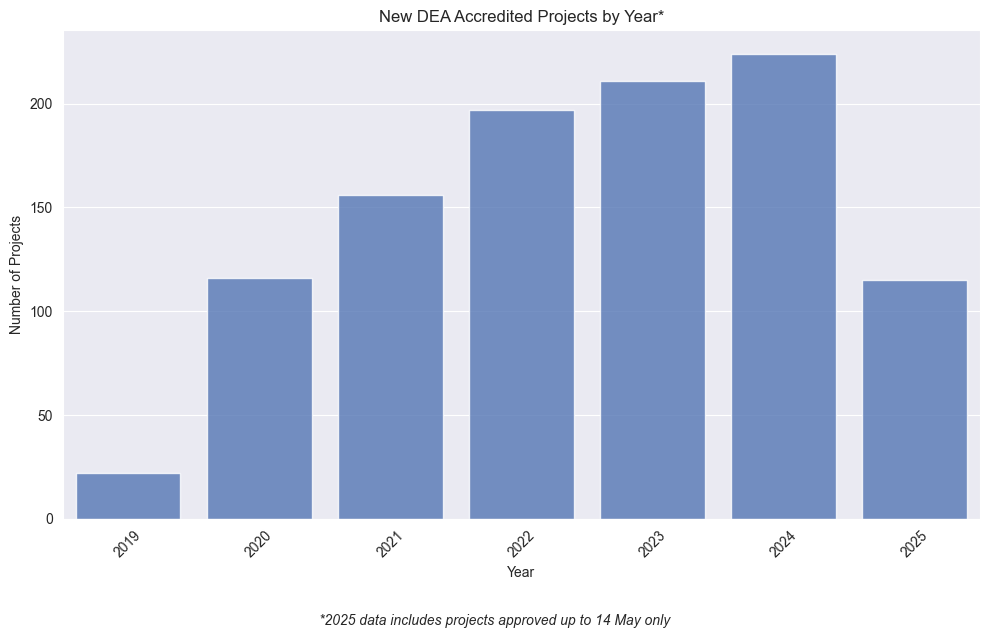

In [85]:
# Number of DEA accredited projects by year
sns.set_style("darkgrid")

plt.figure(figsize=(10, 6))

year_order = sorted(df['Accreditation Date Year'].dropna().unique())

sns.countplot(
    data=df,
    x='Accreditation Date Year',
    order=year_order,
    color='#4472C4',
    alpha=0.8,
    edgecolor='white'
)

plt.title('New DEA Accredited Projects by Year*')
plt.xlabel('Year')
plt.ylabel('Number of Projects')
plt.xticks(rotation=45)

plt.figtext(0.5, -0.05, '*2025 data includes projects approved up to 14 May only',
            ha='center', fontsize=10, style='italic')

plt.tight_layout()
plt.show()

- There is steady year-on-year growth in the number of approved projects under the DEA (note 2025 data is only to mid-May 2025)

In [ ]:
flagship_projects = df[df['Project ID'].isin(data_flagship['Project ID'].unique())]
flagship_projects

,Project ID,Title,Researchers,Legal Basis,Datasets Used,Secure Research Service,Accreditation Date,Accreditation Date Quarter,Accreditation Date Year,quarter_date,Quarter Label,datasets_clean,dataset_list
157,2021/035,"Shaping, testing and demonstrating the value o...","Polina Obolenskaya,\nLondon School of Economic...",Digital Economy Act 2017,Office for National Statistics: Growing Up in ...,Office for National Statistics Secure Research...,2021-11-05,2021Q4,2021,2021-10-01,Q4 2021,office for national statistics: growing up in ...,[growing up in england wave 1]
159,2021/038,Using linked Magistrates and Crown Court data ...,"Rebecca Pattinson, University of Lancaster",Digital Economy Act 2017,Ministry of Justice: MoJ Data First Crown cour...,Office for National Statistics Secure Research...,2021-04-21,2021Q2,2021,2021-04-01,Q2 2021,ministry of justice: moj data first crown cour...,[moj data first crown court defendant case lev...
160,2021/039,A ticking social timebomb?' An investigation i...,"Angela Sorsby, University of Sheffield",Digital Economy Act 2017,Ministry of Justice: MoJ Data First Crown cour...,Office for National Statistics Secure Research...,2021-11-05,2021Q4,2021,2021-10-01,Q4 2021,ministry of justice: moj data first crown cour...,[moj data first crown court defendant case lev...
161,2021/040,"Understanding the nature, extent and outcomes ...","Tim McSweeney, University of Hertfordshire",Digital Economy Act 2017,Ministry of Justice: MoJ Data First Crown cour...,Office for National Statistics Secure Research...,2021-04-16,2021Q2,2021,2021-04-01,Q2 2021,ministry of justice: moj data first crown cour...,[moj data first crown court defendant case lev...
162,2021/041,Ethnic inequalities in the Criminal Justice Sy...,"Kitty Lymperopoulou, Manchester Metropolitan U...",Digital Economy Act 2017,Ministry of Justice: MoJ Data First Crown cour...,Office for National Statistics Secure Research...,2021-04-21,2021Q2,2021,2021-04-01,Q2 2021,ministry of justice: moj data first crown cour...,[moj data first crown court defendant case lev...
...,...,...,...,...,...,...,...,...,...,...,...,...,...
1141,2025/039,Decoding the Signals from Classrooms: Early Wa...,"Huamao Wang, University of Nottingham",Digital Economy Act 2017,NHS; DfE: Education and Child Health Insights ...,Office for National Statistics Secure Research...,2025-02-12,2025Q1,2025,2025-01-01,Q1 2025,nhs; dfe: education and child health insights ...,"[nhs, education and child health insights from..."
1142,2025/042,Understanding Household and Parental Predictor...,"Yu Cui, University of Reading\nHolly Joseph, U...",Digital Economy Act 2017,Office for National Statistics & Department fo...,Office for National Statistics Secure Research...,2025-02-19,2025Q1,2025,2025-01-01,Q1 2025,office for national statistics & department fo...,"[growing up in england wave 1, growing up in e..."
1143,2025/056,The Heterogeneous Impact of Urban Renewal Prog...,"Edoardo Badii, University of Warwick\nPaul Dav...",Digital Economy Act 2017,Office for National Statistics: Annual Respond...,Office for National Statistics Secure Research...,2025-02-26,2025Q1,2025,2025-01-01,Q1 2025,office for national statistics: annual respond...,"[annual respondents, database x ­ uk, annual s..."
1145,2025/074,Examining Associations between Disability with...,"Lijie Zeng, University of Edinburgh\nJasmin We...",Digital Economy Act 2017,Office for National Statistics & Department fo...,Office for National Statistics Secure Research...,2025-03-12,2025Q1,2025,2025-01-01,Q1 2025,office for national statistics & department fo...,"[growing up in england wave 1, growing up in e..."


- Since Q1 2021 to end of Q1 2025, there have been 173 projects requesting access to a total of 218 ADR UK flagship datasets

In [ ]:
# Truncate data up to (end of) Q1 2025, as we don't have all the data for Q2 2025 yet
# Define the cutoff: start of Q2 2025 = 1 April 2025
cutoff = pd.to_datetime("2025-04-01")

# Filter data_flagship to keep only rows before Q2 2025
data_flagship = data_flagship[data_flagship['Accreditation Date'] < cutoff]

C:\Users\balin\AppData\Local\Temp\ipykernel_22260\2788880666.py:39: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.
  ax1.set_xticklabels(new_labels)


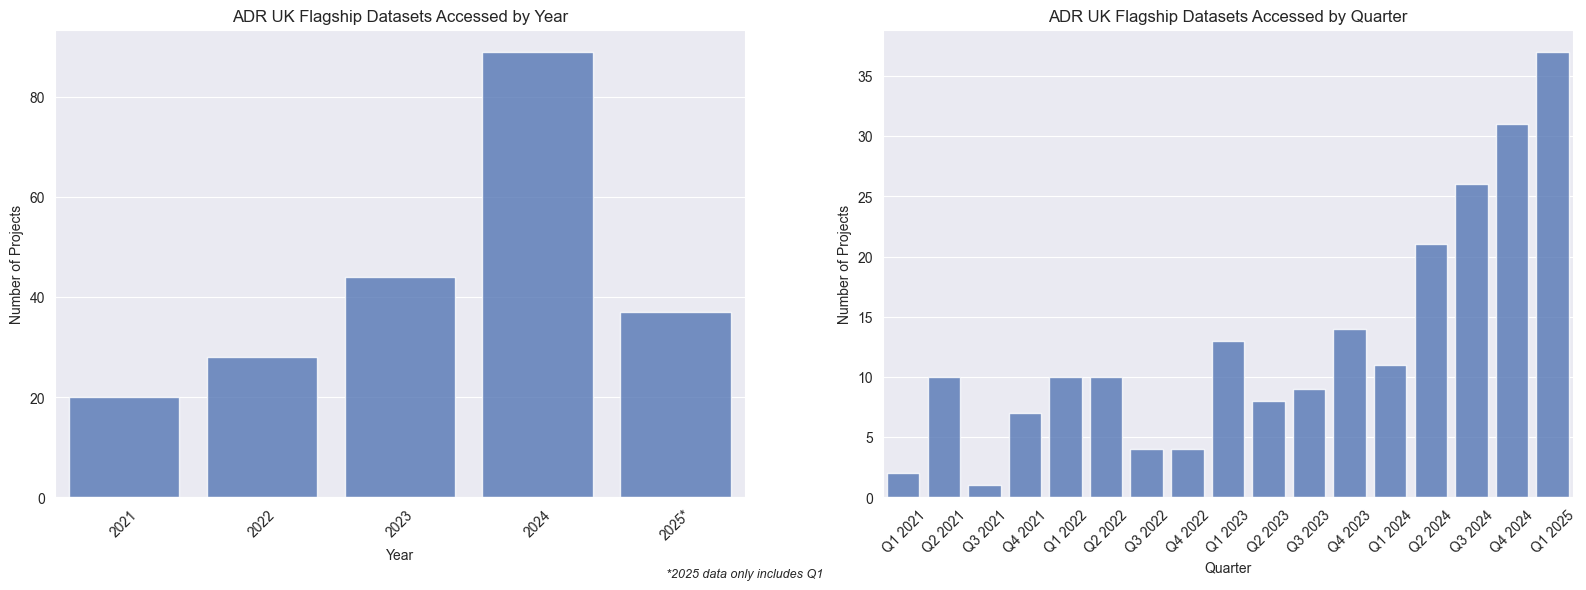

In [ ]:
# Prepare data for both plots
year_order = sorted(data_flagship['Accreditation Date Year'].dropna().unique())

# Create quarter labels and ordering
quarter_periods = data_flagship['Accreditation Date Quarter'].dropna().unique()
quarter_periods_sorted = sorted(quarter_periods)
quarter_labels_ordered = [f"Q{q.quarter} {q.year}" for q in quarter_periods_sorted]
data_flagship['Quarter Label Clean'] = (
    'Q' + data_flagship['Accreditation Date Quarter'].dt.quarter.astype(str) + 
    ' ' + data_flagship['Accreditation Date Quarter'].dt.year.astype(str)
)

# Create side-by-side subplots
fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(16, 6))

# Annual plot
sns.countplot(
    data=data_flagship,
    x='Accreditation Date Year',
    order=year_order,
    color='#4472C4',
    alpha=0.8,
    edgecolor='white',
    ax=ax1
)
ax1.set_title('ADR UK Flagship Datasets Accessed by Year*')
ax1.set_xlabel('Year')
ax1.set_ylabel('Number of Projects')
ax1.tick_params(axis='x', rotation=45)

# Add asterisk to 2025 bar and note
x_labels = ax1.get_xticklabels()
new_labels = []
for label in x_labels:
    if label.get_text() == '2025':
        new_labels.append('2025*')
    else:
        new_labels.append(label.get_text())
ax1.set_xticklabels(new_labels)

# Find the position of 2025 on the x-axis and place footnote near it
year_positions = {year: i for i, year in enumerate(year_order)}
if 2025 in year_positions:
    pos_2025 = year_positions[2025]
    # Convert to axis coordinates (0-1 range)
    x_pos = pos_2025 / (len(year_order) - 1) if len(year_order) > 1 else 0.5
    ax1.text(x_pos, -0.15, '*2025 data only includes Q1', transform=ax1.transAxes, 
             fontsize=9, style='italic', ha='center', verticalalignment='top')

# Quarterly plot
sns.countplot(
    data=data_flagship,
    x='Quarter Label Clean',
    order=quarter_labels_ordered,
    color='#4472C4',
    alpha=0.8,
    edgecolor='white',
    ax=ax2
)
ax2.set_title('ADR UK Flagship Datasets Accessed by Quarter')
ax2.set_xlabel('Quarter')
ax2.set_ylabel('Number of Projects')
ax2.tick_params(axis='x', rotation=45)

plt.tight_layout()
plt.show()

In [ ]:
# Extract quarterly totals from the count_table
# Filter out summary rows and get only quarterly data
quarterly_rows = count_table[~count_table.index.isin(['Total', 'Mean', 'Median'])]
quarterly_totals = quarterly_rows['Total']

# Create a clean dataframe for analysis
quarters_df = pd.DataFrame({
    'Quarter': quarterly_totals.index,
    'Projects': quarterly_totals.values
})

# Convert quarter labels to datetime for proper analysis
def quarter_to_date(quarter_str):
    """Convert 'Q1 2021' format to datetime"""
    parts = quarter_str.split()
    quarter = int(parts[0][1:])  # Remove 'Q' and convert
    year = int(parts[1])
    month = (quarter - 1) * 3 + 1  # Q1=1, Q2=4, Q3=7, Q4=10
    return pd.Timestamp(year, month, 1)

quarters_df['Date'] = quarters_df['Quarter'].apply(quarter_to_date)
quarters_df = quarters_df.sort_values('Date').reset_index(drop=True)
quarters_df['Year'] = quarters_df['Date'].dt.year

# Group by year and calculate annual totals (only for complete years)
annual_data = quarters_df.groupby('Year').agg({
    'Projects': ['sum', 'mean', 'std', 'count']
}).round(1)

annual_data.columns = ['Annual_Total', 'Quarterly_Mean', 'Quarterly_Std', 'Quarters_Count']

# Only include years with 4 complete quarters
complete_years = annual_data[annual_data['Quarters_Count'] == 4].copy()

# Calculate additional metrics
complete_years['CV'] = (complete_years['Quarterly_Std'] / complete_years['Quarterly_Mean']).round(3)
complete_years['YoY_Growth'] = complete_years['Annual_Total'].pct_change() * 100

print("# ADR UK Flagship Collections - Annual Performance Analysis")
print()
print(f"**Analysis Period:** {quarters_df['Quarter'].iloc[0]} to {quarters_df['Quarter'].iloc[-1]}")
print(f"**Total Quarters:** {len(quarters_df)}")
print()

# ========================================
# MARKDOWN TABLE 1: ANNUAL PERFORMANCE
# ========================================
print("## Annual Performance Summary")
print()
print("| Year | Annual Total | Avg per Quarter | Quarterly Std Dev | CV | YoY Growth |")
print("|------|--------------|-----------------|-------------------|----|-----------:|")

for year, row in complete_years.iterrows():
    annual_total = int(row['Annual_Total'])
    quarterly_mean = f"{row['Quarterly_Mean']:.1f}"
    quarterly_std = f"{row['Quarterly_Std']:.1f}"
    cv = f"{row['CV']:.3f}"
    
    # Handle YoY growth (first year will be NaN)
    if pd.isna(row['YoY_Growth']):
        yoy_growth = "—"
    else:
        yoy_growth = f"{row['YoY_Growth']:+.1f}%"
    
    print(f"| {year} | {annual_total} | {quarterly_mean} | {quarterly_std} | {cv} | {yoy_growth} |")

print()

# ========================================
# MARKDOWN TABLE 2: QUARTERLY BREAKDOWN
# ========================================
print("## Quarterly Breakdown")
print()

# Create quarterly pivot table
quarterly_pivot = quarters_df.pivot_table(
    index='Year', 
    columns=quarters_df['Quarter'].str.split().str[0],  # Extract Q1, Q2, etc.
    values='Projects', 
    aggfunc='first'
).fillna('—')

# Reorder columns to Q1, Q2, Q3, Q4
quarter_cols = ['Q1', 'Q2', 'Q3', 'Q4']
available_cols = [col for col in quarter_cols if col in quarterly_pivot.columns]
quarterly_pivot = quarterly_pivot[available_cols]

# Add annual total column
quarterly_pivot['Annual Total'] = quarterly_pivot.replace('—', 0).sum(axis=1)
quarterly_pivot = quarterly_pivot.replace(0, '—')  # Convert back zeros to dashes for display

print("| Year | Q1 | Q2 | Q3 | Q4 | Annual Total |")
print("|------|----|----|----|----|-------------:|")

for year, row in quarterly_pivot.iterrows():
    if year in complete_years.index:  # Only show complete years
        q_values = []
        for col in available_cols:
            val = row[col]
            q_values.append(str(int(val)) if val != '—' else '—')
        
        annual_val = int(complete_years.loc[year, 'Annual_Total'])
        q_str = " | ".join(q_values)
        print(f"| {year} | {q_str} | {annual_val} |")

print()

# ========================================
# KEY METRICS SUMMARY
# ========================================
if len(complete_years) > 1:
    print("## Key Growth Metrics")
    print()
    
    # Calculate CAGR
    first_year_total = complete_years.iloc[0]['Annual_Total']
    last_year_total = complete_years.iloc[-1]['Annual_Total']
    years_span = len(complete_years) - 1
    
    if years_span > 0 and first_year_total > 0:
        cagr = (((last_year_total / first_year_total) ** (1/years_span)) - 1) * 100
    
    # Summary stats
    total_growth = ((last_year_total / first_year_total) - 1) * 100
    avg_annual_projects = complete_years['Annual_Total'].mean()
    most_stable_year = complete_years.loc[complete_years['CV'].idxmin()].name
    most_volatile_year = complete_years.loc[complete_years['CV'].idxmax()].name
    
    print("| Metric | Value |")
    print("|--------|------:|")
    print(f"| **CAGR ({complete_years.index[0]}-{complete_years.index[-1]})** | **{cagr:.1f}%** |")
    print(f"| Total Growth | {total_growth:.1f}% |")
    print(f"| Average Annual Projects | {avg_annual_projects:.0f} |")
    print(f"| Most Stable Year (lowest CV) | {most_stable_year} |")
    print(f"| Most Volatile Year (highest CV) | {most_volatile_year} |")
    
    print()
    print("**Notes:**")
    print("- CV = Coefficient of Variation (volatility measure)")
    print("- Lower CV indicates more consistent quarterly performance")
    print("- YoY = Year-over-Year growth rate")

print()
print("---")
print(f"*Analysis generated on {pd.Timestamp.now().strftime('%Y-%m-%d')}*")

### Annual Performance Summary

| Year | Annual Total | Avg per Quarter | Quarterly Std Dev | CV | YoY Growth |
|------|--------------|-----------------|-------------------|----|-----------:|
| 2021 | 20 | 5.0 | 4.2 | 0.840 | — |
| 2022 | 28 | 7.0 | 3.5 | 0.500 | +40.0% |
| 2023 | 44 | 11.0 | 2.9 | 0.264 | +57.1% |
| 2024 | 89 | 22.2 | 8.5 | 0.383 | +102.3% |

### Quarterly Breakdown

| Year | Q1 | Q2 | Q3 | Q4 | Annual Total |
|------|----|----|----|----|-------------:|
| 2021 | 2 | 10 | 1 | 7 | 20 |
| 2022 | 10 | 10 | 4 | 4 | 28 |
| 2023 | 13 | 8 | 9 | 14 | 44 |
| 2024 | 11 | 21 | 26 | 31 | 89 |

### Key Growth Metrics

| Metric | Value |
|--------|------:|
| **Compound Annual Growth Rate (2021-2024)** | **64.5%** |
| Total Growth | 345.0% |
| Average Annual Projects | 45 |

**Notes:**
- CV = Coefficient of Variation (volatility measure)
- Lower CV indicates more consistent quarterly performance
- YoY = Year-over-Year growth rate

## Summary findings
Overall demand for ADR UK flagship datasets has exhibited rapid growth:
    - The number of requests for ADR UK flagship datasets **more than quadrupled** from 20 in 2021 to 89 in 2024 (growth rate of 345%).
    - The annual compounded growth rate in the use of these datasets is around 65%. This equates to a **doubling in the use of flagship datasets around every 1.5 years** over the observed time period.
The demand for these datasets can be split into roughly 3 phases:
    - 2021-2022: Foundation phase. Started with 20 requests in 2021, 40% growth in year two
    - 2023: Breakthrough year. Saw 57% growth, reaching 44 projects in that year and much better consistency in access requests - volatility fell from 84% (2021 coefficient of variation = 0.84) to 26% (2023 coefficient of variation = 0.26)
    - 2024: Acceleration phase. Doubled output with 102% growth to 89 approved access requests, with the steady quarterly growth (11 → 21 → 26 → 31 access requests) maintained into Q1 of 2025 (37 access requersts)

In [ ]:
# Some quarters have zero counts, so we need to create a full quarterly index
# Create full quarterly index from min to max quarter
full_quarters = pd.period_range(
    start=data_flagship['Accreditation Date Quarter'].min(),
    end=data_flagship['Accreditation Date Quarter'].max(),
    freq='Q'
)

# Create full multi-index with all collections
collections = data_flagship['collection'].dropna().unique()
full_index = pd.MultiIndex.from_product([full_quarters, collections], names=['Accreditation Date Quarter', 'collection'])

# Reindex to fill missing quarters with zero
collection_quarter_counts = (
    data_flagship
    .groupby(['Accreditation Date Quarter', 'collection'])
    .size()
    .reindex(full_index, fill_value=0)
    .reset_index(name='count')
)

# Add quarter_date and labels again
collection_quarter_counts['quarter_date'] = collection_quarter_counts['Accreditation Date Quarter'].dt.to_timestamp(how = 'start')
collection_quarter_counts['Quarter Label'] = collection_quarter_counts['Accreditation Date Quarter'].apply(
    lambda p: f"Q{p.quarter} {p.year}"
)

## Breakdowns by individual ADR UK flagship datatset collections

### Datasets included in WED collection:
- Annual Survey of Hours and Earnings Longitudinal  
- Annual Survey of Hours and Earnings Linked to Census 2011  
- Annual Survey of Hours and Earnings Linked to PAYE and Self-Assessment Data  

### Datasets included in Data First collection:
- Data First: Crown Court Dataset  
- Data First: Cross-Justice System Linking Dataset  
- Data First: Prisoner Dataset  
- Data First: Probation Dataset  
- Data First: Family Court Dataset  
- Data First: Magistrates Court Dataset  

In [91]:
# Generate summary tables of the data for the ADR UK flagship collections
# Create the full quarterly range
full_quarters = pd.period_range(
    start=data_flagship['Accreditation Date Quarter'].min(),
    end=data_flagship['Accreditation Date Quarter'].max(),
    freq='Q'
)

# Get all collections
collections = data_flagship['collection'].dropna().unique()

# Create the complete combinations
full_combinations = []
for quarter in full_quarters:
    for collection in collections:
        full_combinations.append({
            'Accreditation Date Quarter': quarter,
            'collection': collection,
            'quarter_date': quarter.to_timestamp(how='start'),
            'Quarter Label': f"Q{quarter.quarter} {quarter.year}"
        })

# Create the base dataframe with all combinations
base_df = pd.DataFrame(full_combinations)

# Get actual counts from original data
actual_counts = (
    data_flagship
    .groupby(['Accreditation Date Quarter', 'collection'])
    .size()
    .reset_index(name='count')
)

# Merge with base dataframe, filling missing with 0
collection_quarter_counts_new = base_df.merge(
    actual_counts,
    on=['Accreditation Date Quarter', 'collection'],
    how='left'
)
collection_quarter_counts_new['count'] = collection_quarter_counts_new['count'].fillna(0).astype(int)

# Find first appearance of each collection
first_appearance = (
    collection_quarter_counts_new[collection_quarter_counts_new['count'] > 0]
    .groupby('collection')['quarter_date']
    .min()
    .reset_index()
    .rename(columns={'quarter_date': 'first_quarter'})
)

# Merge back
collection_quarter_counts_new = collection_quarter_counts_new.merge(
    first_appearance,
    on='collection',
    how='left'
)

# Apply the logic
def assign_values(row):
    if pd.isna(row['first_quarter']):
        return np.nan  # Collection never appeared
    elif row['quarter_date'] < row['first_quarter']:
        return np.nan  # Before first appearance
    else:
        return row['count']  # Use actual count (0 or positive)

collection_quarter_counts_new['adjusted_count'] = collection_quarter_counts_new.apply(assign_values, axis=1)

# Remove incomplete Q2 2025 data
collection_quarter_counts_new = collection_quarter_counts_new[
    ~((collection_quarter_counts_new['quarter_date'].dt.year == 2025) & 
      (collection_quarter_counts_new['quarter_date'].dt.quarter == 2))
]

# Create the pivot tables with proper chronological ordering
collection_quarter_counts_new = collection_quarter_counts_new.sort_values('quarter_date')

# Create count pivot using quarter_date as index, then map to Quarter Label
count_pivot = collection_quarter_counts_new.pivot_table(
    values='adjusted_count',
    index='quarter_date',
    columns='collection',
    aggfunc='first'
)

# Create a mapping from quarter_date to Quarter Label in chronological order
quarter_label_mapping = (
    collection_quarter_counts_new[['quarter_date', 'Quarter Label']]
    .drop_duplicates()
    .sort_values('quarter_date')
    .set_index('quarter_date')['Quarter Label']
)

# Map the index to Quarter Labels while preserving order
count_pivot.index = count_pivot.index.map(quarter_label_mapping)
count_pivot.index.name = 'Quarter Label'

# Add row totals column
count_pivot['Total'] = count_pivot.sum(axis=1, skipna=True)

# ========================================
# ENHANCED SUMMARY STATISTICS WITH GROWTH METRICS
# ========================================

# Calculate summary statistics as rows (not mixing columns and rows)
def calculate_summary_row(df, stat_name, func):
    """Calculate a summary statistic row across all collection columns"""
    summary_row = {}
    for col in df.columns:
        if col == 'Total':
            # For the Total column, sum all quarterly totals
            if stat_name == 'Total':
                summary_row[col] = df[col].sum()
            elif stat_name == 'Mean':
                summary_row[col] = df[col].mean()
            elif stat_name == 'Std_Dev':
                summary_row[col] = df[col].std()
            else:
                summary_row[col] = func(df[col].dropna()) if len(df[col].dropna()) > 0 else 0
        else:
            # For individual collections
            valid_data = df[col].dropna()
            if len(valid_data) == 0:
                summary_row[col] = 0
            else:
                if stat_name == 'Total':
                    summary_row[col] = valid_data.sum()
                elif stat_name == 'Mean':
                    summary_row[col] = valid_data.mean()
                elif stat_name == 'Std_Dev':
                    summary_row[col] = valid_data.std()
                elif stat_name == 'CV':
                    mean_val = valid_data.mean()
                    std_val = valid_data.std()
                    summary_row[col] = std_val / mean_val if mean_val > 0 else 0
                elif stat_name == 'Quarterly_Growth_Rate':
                    # Calculate average quarterly growth rate
                    if len(valid_data) > 1:
                        non_zero_data = valid_data[valid_data > 0]
                        if len(non_zero_data) > 1:
                            growth_rates = []
                            for i in range(1, len(non_zero_data)):
                                prev_val = non_zero_data.iloc[i-1]
                                curr_val = non_zero_data.iloc[i]
                                if prev_val > 0:
                                    growth_rate = ((curr_val / prev_val) - 1) * 100
                                    growth_rates.append(growth_rate)
                            summary_row[col] = np.mean(growth_rates) if growth_rates else 0
                        else:
                            summary_row[col] = 0
                    else:
                        summary_row[col] = 0
                elif stat_name == 'Active_Quarters':
                    summary_row[col] = len(valid_data)
                else:
                    summary_row[col] = func(valid_data)
    
    return pd.Series(summary_row, name=stat_name)

# Create summary statistics rows
summary_rows = []
summary_rows.append(calculate_summary_row(count_pivot, 'Total', lambda x: x.sum()))
summary_rows.append(calculate_summary_row(count_pivot, 'Mean', lambda x: x.mean()))
summary_rows.append(calculate_summary_row(count_pivot, 'Std_Dev', lambda x: x.std()))
summary_rows.append(calculate_summary_row(count_pivot, 'CV', lambda x: x.std()/x.mean() if x.mean() > 0 else 0))
summary_rows.append(calculate_summary_row(count_pivot, 'Quarterly_Growth_Rate', lambda x: 0))
summary_rows.append(calculate_summary_row(count_pivot, 'Active_Quarters', lambda x: len(x)))

# Create summary DataFrame
summary_df = pd.DataFrame(summary_rows)

# Round the summary statistics for display
summary_df = summary_df.round({
    col: 2 if col != 'Total' else 0 for col in summary_df.columns
})

# Apply consistent rounding: 2 decimal places for most metrics, whole numbers for growth rate
for metric in ['Mean', 'Std_Dev', 'CV']:
    if metric in summary_df.index:
        summary_df.loc[metric] = summary_df.loc[metric].round(2)

# Round Quarterly_Growth_Rate to whole numbers
if 'Quarterly_Growth_Rate' in summary_df.index:
    summary_df.loc['Quarterly_Growth_Rate'] = summary_df.loc['Quarterly_Growth_Rate'].round(0)

# Keep Active_Quarters as integers
if 'Active_Quarters' in summary_df.index:
    summary_df.loc['Active_Quarters'] = summary_df.loc['Active_Quarters'].round(0)

# Combine quarterly data with summary statistics
count_table = pd.concat([count_pivot, summary_df])

print("=== ADR UK FLAGSHIP COLLECTIONS - INDIVIDUAL DATASET ANALYSIS ===")
print(f"Analysis period: {count_pivot.index[0]} to {count_pivot.index[-1]}")
print(f"Total collections analyzed: {len(collections)}")
print()

# ========================================
# COLLECTION PERFORMANCE SUMMARY
# ========================================
print("COLLECTION PERFORMANCE SUMMARY")
print("=" * 60)
print(f"{'Collection':<25} {'Total':<6} {'Avg/Q':<6} {'CV':<6} {'QGR%':<6} {'Quarters':<8}")
print("-" * 60)

# Get summary statistics for individual collections (exclude 'Total' column)
collection_columns = [col for col in count_pivot.columns if col != 'Total']
collection_summary = summary_df[collection_columns].T
collection_summary = collection_summary.sort_values('Total', ascending=False)

for collection, row in collection_summary.iterrows():
    total = int(row['Total'])
    mean_val = f"{row['Mean']:.2f}"
    cv = f"{row['CV']:.2f}"
    qgr = f"{row['Quarterly_Growth_Rate']:+.0f}"
    quarters = int(row['Active_Quarters'])
    
    print(f"{collection:<25} {total:<6} {mean_val:<6} {cv:<6} {qgr:<6} {quarters:<8}")

print()
print("Legend:")
print("- Total: Total projects across all quarters")
print("- Avg/Q: Average projects per active quarter")
print("- CV: Coefficient of Variation (volatility measure)")
print("- QGR%: Average quarterly growth rate")
print("- Quarters: Number of active quarters")
print()

# ========================================
# TOP PERFORMERS ANALYSIS
# ========================================
print("TOP PERFORMERS ANALYSIS")
print("=" * 40)

# Top by volume
top_volume = collection_summary.nlargest(3, 'Total')
print("🏆 TOP 3 BY TOTAL VOLUME:")
for i, (collection, row) in enumerate(top_volume.iterrows(), 1):
    print(f"  {i}. {collection}: {int(row['Total'])} projects")

print()

# Top by average quarterly access requests
top_avg_quarterly = collection_summary.nlargest(3, 'Mean')
print("📊 TOP 3 BY AVG QUARTERLY ACCESS REQUESTS:")
for i, (collection, row) in enumerate(top_avg_quarterly.iterrows(), 1):
    print(f"  {i}. {collection}: {row['Mean']:.2f} projects per quarter")

# Top by growth rate (minimum 2 active quarters)
eligible_for_growth = collection_summary[collection_summary['Active_Quarters'] >= 2]
if len(eligible_for_growth) > 0:
    top_growth = eligible_for_growth.nlargest(3, 'Quarterly_Growth_Rate')
    print("📈 TOP 3 BY QUARTERLY GROWTH RATE:")
    for i, (collection, row) in enumerate(top_growth.iterrows(), 1):
        print(f"  {i}. {collection}: {row['Quarterly_Growth_Rate']:+.0f}% per quarter")

print()

# Most consistent (lowest CV, minimum 3 quarters and >0 total)
eligible_for_consistency = collection_summary[
    (collection_summary['Active_Quarters'] >= 3) & 
    (collection_summary['Total'] > 0)
]
if len(eligible_for_consistency) > 0:
    most_consistent = eligible_for_consistency.nsmallest(3, 'CV')
    print("🎯 TOP 3 MOST CONSISTENT (Lowest CV):")
    for i, (collection, row) in enumerate(most_consistent.iterrows(), 1):
        print(f"  {i}. {collection}: CV = {row['CV']:.2f}")

print()

# Summary insights
total_projects = int(summary_df.loc['Total', 'Total'])
active_collections = len(collection_summary[collection_summary['Total'] > 0])
avg_projects_per_collection = collection_summary['Total'].mean()

print("📊 SUMMARY INSIGHTS:")
print(f"- {active_collections} collections have delivered projects")
print(f"- Average of {avg_projects_per_collection:.1f} projects per active collection")
print(f"- Combined total: {total_projects} projects across all collections")

# Display the full table
print()
print("DETAILED QUARTERLY DATA:")
print("=" * 40)
print(count_table)

=== ADR UK FLAGSHIP COLLECTIONS - INDIVIDUAL DATASET ANALYSIS ===
Analysis period: Q1 2021 to Q1 2025
Total collections analyzed: 7

COLLECTION PERFORMANCE SUMMARY
Collection                Total  Avg/Q  CV     QGR%   Quarters
------------------------------------------------------------
LEO                       80     5.00   0.97   +98    16      
Data First                49     3.06   1.13   +95    16      
Wage and Employment Dynamics 31     1.82   0.65   +33    17      
ECHILD                    23     7.67   0.76   +460   3       
Growing up in England     21     1.50   1.19   +38    14      
GRADE                     10     3.33   0.62   -48    3       
Agricultural Research Collection 4      0.36   1.85   +50    11      

Legend:
- Total: Total projects across all quarters
- Avg/Q: Average projects per active quarter
- CV: Coefficient of Variation (volatility measure)
- QGR%: Average quarterly growth rate
- Quarters: Number of active quarters

TOP PERFORMERS ANALYSIS
🏆 TOP 3 BY

- Total of 218 access requests across yyyy different projects (some projects applied to use more than one flagship dataset)

## Summary results table for individual collections

| Collection                     | Total | Avg Requests per Active Quarter |   Coefficient of Variation  | Avg Quarterly Growth Rate (%)   | # Active Quarters |
|-------------------------------|--------|-------|-------|--------|----------|
| LEO                           | 80     | 5.0   | 0.97 | +98% | 16       |
| Data First                    | 49     | 3.1   | 1.13 | +95% | 16       |
| Wage and Employment Dynamics | 31     | 1.8   | 0.650 | +33% | 17       |
| ECHILD                        | 23     | 7.7   | 0.76 | +460%| 3        |
| Growing up in England         | 21     | 1.5   | 1.19 | +38% | 14       |
| GRADE                         | 10     | 3.3   | 0.62 | -48% | 3        |
| Agricultural Research Collection | 4  | 0.4   | 1.85 | +50% | 11       |

 ## Most popular datasets:
 
 TOP 3 BY TOTAL VOLUME:
  1. LEO: 80 requests
  2. Data First: 49 requests
  3. Wage and Employment Dynamics: 31 requests

 TOP 3 BY AVG QUARTERLY ACCESS REQUESTS:
  1. ECHILD: 7.67 projects per quarter
  2. LEO: 5.00 projects per quarter
  3. GRADE: 3.33 projects per quarter

TOP 3 BY QUARTERLY GROWTH RATE:
  1. ECHILD: +460.0% per quarter*
  2. LEO: +97.6% per quarter
  3. Data First: +94.9% per quarter

*The exceptionally high growth rate observed for ECHILD reflects its recent introduction, with access beginning only in the last three quarters - this short baseline inflates the calculated growth and should not be interpreted as a sustained long-term trend.


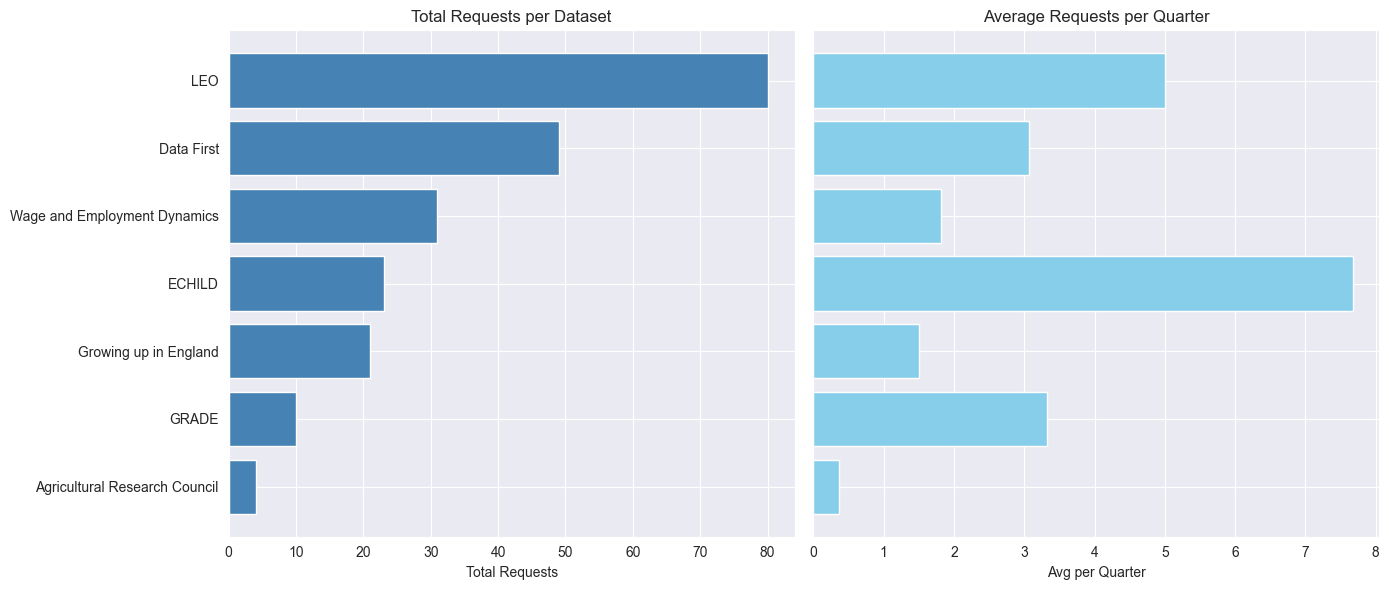

In [ ]:
data = {
    "Dataset": [
        "Agricultural Research Collection", "Data First", "ECHILD", "GRADE",
        "Growing up in England", "LEO", "Wage and Employment Dynamics", "Total"
    ],
    "Quarters": [
        11, 16, 3, 3,
        14, 16, 17, 19
    ],
    "Total Requests": [
        4, 49, 23, 10,
        21, 80, 31, 218
    ],
    "Avg per Quarter": [
        round(4 / 11, 2),    # 0.36
        round(49 / 16, 2),   # 3.06
        round(23 / 3, 2),    # 7.67
        round(10 / 3, 2),    # 3.33
        round(21 / 14, 2),   # 1.5
        round(80 / 16, 2),   # 5.0
        round(31 / 17, 2),   # 1.82
        round(218 / 19, 2)   # 11.47
    ]
}


# Create DataFrame and exclude "Total"
df = pd.DataFrame(data)
df = df[df["Dataset"] != "Total"]

# Sort by total requests descending
df_sorted = df.sort_values("Total Requests", ascending=False)

# Create side-by-side plots
fig, axes = plt.subplots(1, 2, figsize=(14, 6), sharey=True)

# Total Requests plot (inverted y-axis to show most popular at top)
axes[0].barh(df_sorted["Dataset"], df_sorted["Total Requests"], color='steelblue')
axes[0].set_title("Total Requests per Dataset")
axes[0].set_xlabel("Total Requests")
axes[0].invert_yaxis()

# Avg per Quarter plot (matching y-axis order)
axes[1].barh(df_sorted["Dataset"], df_sorted["Avg per Quarter"], color='skyblue')
axes[1].set_title("Average Requests per Quarter")
axes[1].set_xlabel("Avg per Quarter")

plt.tight_layout()
plt.show()

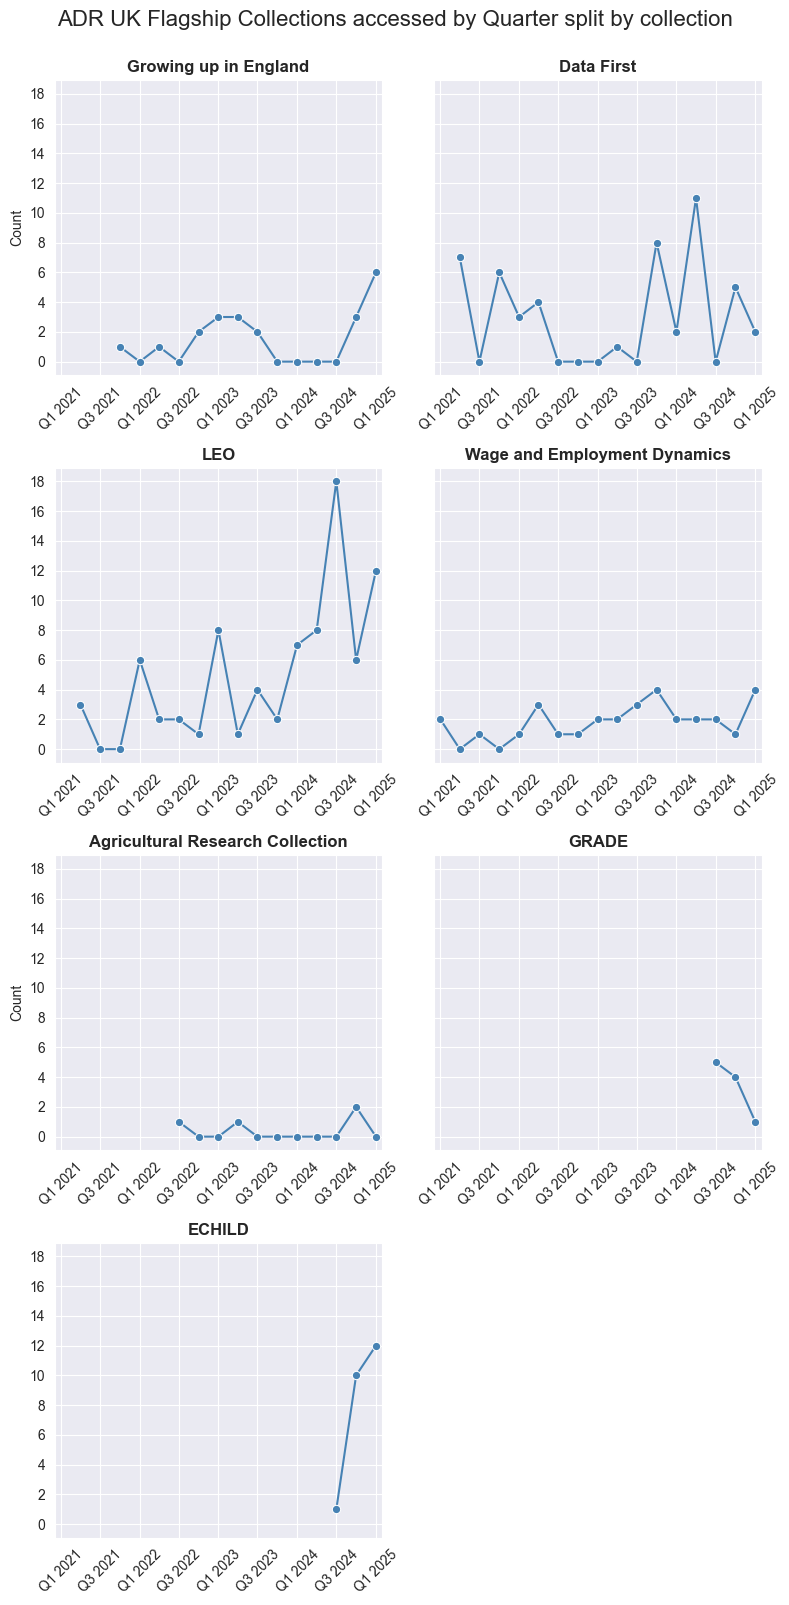

In [96]:
# Get unique collections and the full quarter range
collections = collection_quarter_counts['collection'].unique()
all_quarters = collection_quarter_counts['quarter_date'].unique()
all_quarter_labels = collection_quarter_counts.drop_duplicates('quarter_date')['Quarter Label'].tolist()
n_collections = len(collections)

# Create subplots
fig, axes = plt.subplots(nrows=4, ncols=2, figsize=(8, 16), sharey=True)
axes = axes.flatten()  # Make it easier to iterate

for i, collection in enumerate(collections):
    # Filter data for this collection
    collection_data = collection_quarter_counts[collection_quarter_counts['collection'] == collection].copy()
    
    # Find the first quarter where this collection had any activity (count > 0)
    first_active_quarter = collection_data[collection_data['count'] > 0]['quarter_date'].min()
    
    # If the collection has never been active, skip plotting
    if pd.isna(first_active_quarter):
        axes[i].set_title(f"{collection}\n(No activity)", fontsize=12, fontweight='bold', color='gray')
        axes[i].set_xlabel(None)
        axes[i].set_ylabel('Count' if i % 4 == 0 else '')
        continue
    
    # Filter to only include data from the first active quarter onwards
    filtered_data = collection_data[collection_data['quarter_date'] >= first_active_quarter]
    
    # Plot on the specific subplot
    sns.lineplot(
        data=filtered_data,
        x='quarter_date',
        y='count',
        marker='o',
        ax=axes[i],
        color='steelblue'
    )
    
    # Format the subplot
    axes[i].set_title(collection, fontsize=12, fontweight='bold')
    axes[i].set_xlabel(None)
    axes[i].set_ylabel('Count' if i % 4 == 0 else '')  # Only show y-label on leftmost plots
    axes[i].yaxis.set_major_locator(plt.MaxNLocator(integer=True))
    
    # Set ALL quarters on x-axis (same scale for all subplots)
    step = max(1, len(all_quarters) // 8)  # Show every nth quarter to avoid crowding
    axes[i].set_xticks(all_quarters[::step])
    axes[i].set_xticklabels(all_quarter_labels[::step], rotation=45)
    
    # Set x-axis limits to full range for consistency across all subplots
    time_range = all_quarters[-1] - all_quarters[0]
    padding = time_range * 0.02  # 2% padding on each side
    axes[i].set_xlim(all_quarters[0] - padding, all_quarters[-1] + padding)
    
    # Add small padding to y-axis as well
    axes[i].margins(y=0.05)  # 5% padding on y-axis

# Hide any unused subplots
for i in range(n_collections, len(axes)):
    axes[i].set_visible(False)

plt.suptitle('ADR UK Flagship Collections accessed by Quarter split by collection', fontsize=16, y=1.0)
plt.tight_layout()
plt.show()

## Future directions
- Project growth to predict future project accreditation load (to support e.g. capacity management for Secure Environments like the SRS) as well as demand for different datasets.

Researchers analysis:
- Look at researcher home organisations to understand variation in demand for different flagship datasets among different research organisations (could help identify underrepresented orgs)
- Look at growth in number of accredited researchers, how these are distributed across projects

With additional data:
- Are approval times improving? 
- What are the success rates for project approval?

# Part 2: How have research topics and prioirites evolved over time?

## Approach
- Look at project titles to derive research focus
- Track emerging and declining terms over time
- TF-IDF scoring to identify distinctive terms per period:
    - TF-IDF approach good for longitudinal trend analysis and research prioirity identification, as it
        - Provides temporal normalisation (so accounts for varying absolute number of projects per year) - allows trends across years with different total volumes directly comparable
        - Proides rarity weigthing, so helps to identify more niche but important research areas that might be missed otherwise
        - Comes at the cost of simplicity intuitive interpretation
        - (I ran the analysis using absolute counts, got similar results)
- Track growth/decline of specific research keywords
- Create word clouds or lineplots for top terms and how they change over time

## Analysis of all DEA approved projects

In [ ]:
# Simple count of word frequencies across all project titles
from collections import Counter
import re
import nltk
from nltk.corpus import stopwords

# stopwrods
nltk.download('stopwords')
stop_words = set(stopwords.words('english'))
custom_stopwords = stop_words.union({'uk', 'england', 'analysis', 'data', 'wales', 'northern', 'ireland', 'scotland', 'outcome', 'outcomes', 'effect', 'evaluation', 'impact',
                                     'understanding', 'research', 'study', 'project', 'use', 'used', 'useful', 'using', 'dataset', 'datasets', 'collection', 'effects'})

# Tokenize project titles
def tokenize(text):
    return re.sub(r'[^\w\s]', ' ', #remove punctuation/replace these with a space
                  text.lower()).split()

# Flatten all tokenized words from project titles
all_words = [word for title in df['Title'] for word in tokenize(title) if word not in custom_stopwords]

word_counts = Counter(all_words)

# Display top 20 word counts
print("Most common words in project titles:")
print(word_counts.most_common(20))

Most common words in project titles:
[('labour', 85), ('health', 75), ('market', 74), ('education', 68), ('social', 60), ('covid', 55), ('productivity', 53), ('19', 53), ('economic', 52), ('employment', 44), ('local', 41), ('business', 39), ('innovation', 39), ('level', 38), ('children', 38), ('firm', 36), ('inequalities', 36), ('mobility', 36), ('firms', 32), ('evidence', 31)]


[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\balin\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


In [ ]:
# Cluster analysis
# pre-process the project titles
def preprocess_text(text):
    # Remove punctuation and convert to lowercase
    text = re.sub(r'[^\w\s]', '', text)
    text = text.lower()
    #remove stopwords
    text = ' '.join([word for word in text.split() if word not in custom_stopwords])
    return text
# Apply the preprocessing function to the project titles
df['processed_titles'] = df['Title'].apply(preprocess_text)

# Create a list of all project titles
project_titles = df['processed_titles'].tolist()

In [ ]:
# Vectorise with TF-IDF
from sklearn.feature_extraction.text import TfidfVectorizer

vectorizer = TfidfVectorizer(stop_words=list(custom_stopwords))
X = vectorizer.fit_transform(project_titles)

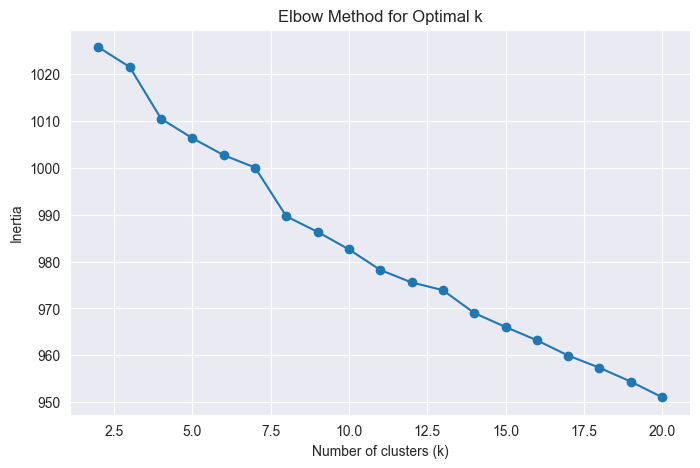

In [ ]:
from sklearn.cluster import KMeans
# Try a range of cluster counts
inertia = []
K_range = range(2, 21)  # Try from 2 to 20 clusters

for k in K_range:
    km = KMeans(n_clusters=k, random_state=42)
    km.fit(X)
    inertia.append(km.inertia_)  # Inertia = sum of squared distances to nearest centroid

# Plot the inertia values to find the "elbow"
plt.figure(figsize=(8, 5))
plt.plot(K_range, inertia, marker='o')
plt.xlabel('Number of clusters (k)')
plt.ylabel('Inertia')
plt.title('Elbow Method for Optimal k')
plt.grid(True)
plt.show()

In [ ]:
# Cluster with KMeans
from sklearn.cluster import KMeans

n_clusters = 4
kmeans = KMeans(n_clusters=n_clusters, random_state=42) # n_clusters as determined from elbow method
kmeans.fit(X)

labels = kmeans.labels_

# generarte dataframe with keywords and their cluster labels
clustered = pd.DataFrame({
    'title': project_titles,
    'cluster': labels
})

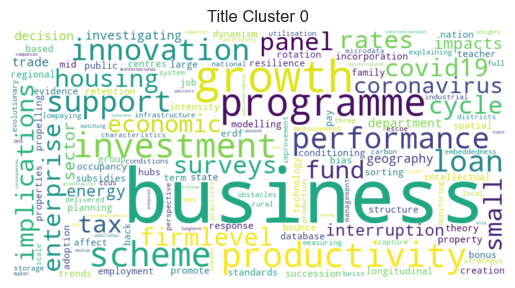

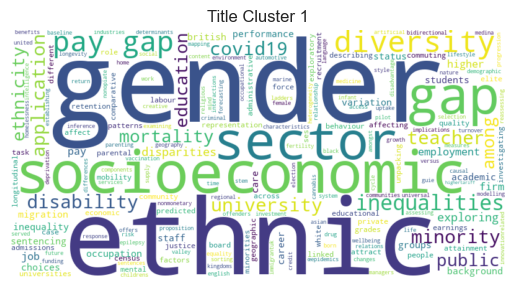

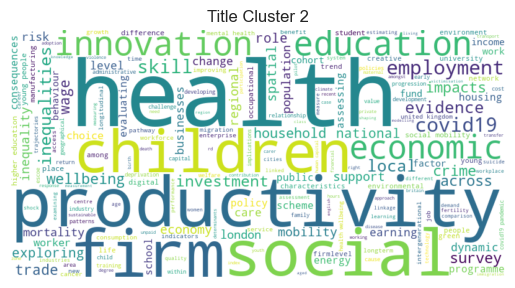

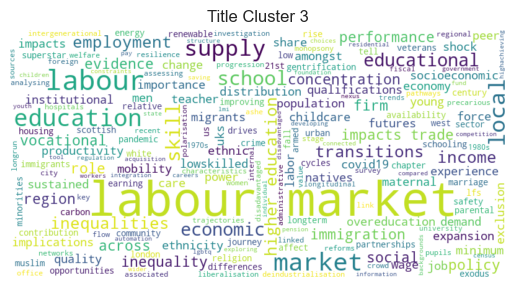

In [ ]:
#visualise with wordcloud
from wordcloud import WordCloud

for i in range(n_clusters):
    text = ' '.join(clustered[clustered['cluster'] == i]['title'])
    wc = WordCloud(width=800, height=400, background_color='white').generate(text)
    
    plt.figure()
    plt.imshow(wc, interpolation='bilinear')
    plt.axis('off')
    plt.title(f"Title Cluster {i}")
    plt.show()

- Research themes across all DEA accredited projects over the past 6 years can be split very broadly into four clusters:
    - Cluster 1: project titles on business, growth, and productivity; 
    - Cluster 2: gender and ethnic inequalities and gaps, 
    - Cluster 3: includes terms on health, social and children;
    - Cluster 4: labour market, skills and education terms.

In [ ]:
df

,Project ID,Title,Researchers,Legal Basis,Datasets Used,Secure Research Service,Accreditation Date,Accreditation Date Quarter,Accreditation Date Year,quarter_date,Quarter Label,datasets_clean,dataset_list,processed_titles
0,2019/003,The fall of the labour share and rise of the s...,"Carolin Ioramashvili, London School of Economics",Digital Economy Act 2017,Office for National Statistics: Annual Respond...,Office for National Statistics Secure Research...,2019-10-25,2019Q4,2019,2019-10-01,Q4 2019,office for national statistics: annual respond...,[annual respondents database],fall labour share rise superstar region labour...
1,2019/004,The changing nature of the HR and training pra...,"Jonathan Boys, Chartered Institute of Personne...",Digital Economy Act 2017,Office for National Statistics: Annual Populat...,Office for National Statistics Secure Research...,2019-10-25,2019Q4,2019,2019-10-01,Q4 2019,office for national statistics: annual populat...,[annual population survey],changing nature hr training practitioner profe...
2,2019/006,Analysis of victimisation data from the Crime ...,"Julian Molina, Office of the Victims' Commissi...",Digital Economy Act 2017,Office for National Statistics: Crime Survey f...,Office for National Statistics Secure Research...,2019-10-14,2019Q4,2019,2019-10-01,Q4 2019,office for national statistics: crime survey f...,[crime survey for england and wales],victimisation crime survey
3,2019/007,Thriving Places index – indicators of wellbein...,"Soraya Safazadeh, Happy City Initiative\nSaama...",Digital Economy Act 2017,Office for National Statistics: Labour Force S...,Office for National Statistics Secure Research...,2019-10-14,2019Q4,2019,2019-10-01,Q4 2019,office for national statistics: labour force s...,[labour force survey & annual population survey],thriving places index indicators wellbeing loc...
4,2019/008,Class in UK creative industries: Beyond partic...,"Rebecca Florisson, The Work Foundation",Digital Economy Act 2017,Office for National Statistics: Labour Force S...,Office for National Statistics Secure Research...,2019-11-19,2019Q4,2019,2019-10-01,Q4 2019,office for national statistics: labour force s...,[labour force survey & annual population surve...,class creative industries beyond participation
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1148,2025/090,Exploring the Link Between Technological Adopt...,"Mariana Sofia Soares \nAraujo Barbosa, Univers...",Digital Economy Act 2017,Office for National Statistics: Annual Busines...,Office for National Statistics Secure Research...,2025-03-28,2025Q1,2025,2025-01-01,Q1 2025,office for national statistics: annual busines...,"[annual business survey, e-commerce and digita...",exploring link technological adoption exportin...
1149,2025/098,The NoRePF Project: Improving maternal and chi...,"Hannah Rayment-Jones, King's College London\nS...",Digital Economy Act 2017,NHS; DfE: Education and Child Health Insights ...,Office for National Statistics Secure Research...,2025-04-09,2025Q2,2025,2025-04-01,Q2 2025,nhs; dfe: education and child health insights ...,"[nhs, education and child health insights from...",norepf improving maternal child health social ...
1150,2025/113,Evaluating expanded childcare entitlements,"Elaine Drayton, Institute for Fiscal Studies\n...",Digital Economy Act 2017,Office for National Statistics: Annual Populat...,Office for National Statistics Secure Research...,2025-05-09,2025Q2,2025,2025-04-01,Q2 2025,office for national statistics: annual populat...,"[annual population survey, annual population s...",evaluating expanded childcare entitlements
1151,2025/114,Marie Curie End of Life Transformation,"Lynne Hughes, Marie Curie\nMichelle Vermeulen",Digital Economy Act 2017,SAIL Databank: Census Wales 2021,SAIL,2025-05-12,2025Q2,2025,2025-04-01,Q2 2025,sail databank: census wales 2021,[census wales 2021],marie curie end life transformation


Documents per year:
2020: 116 projects
2021: 156 projects
2022: 197 projects
2023: 211 projects
2024: 224 projects
2025: 115 projects

Note: 2025 data is partial (Q1 and early Q2 only)


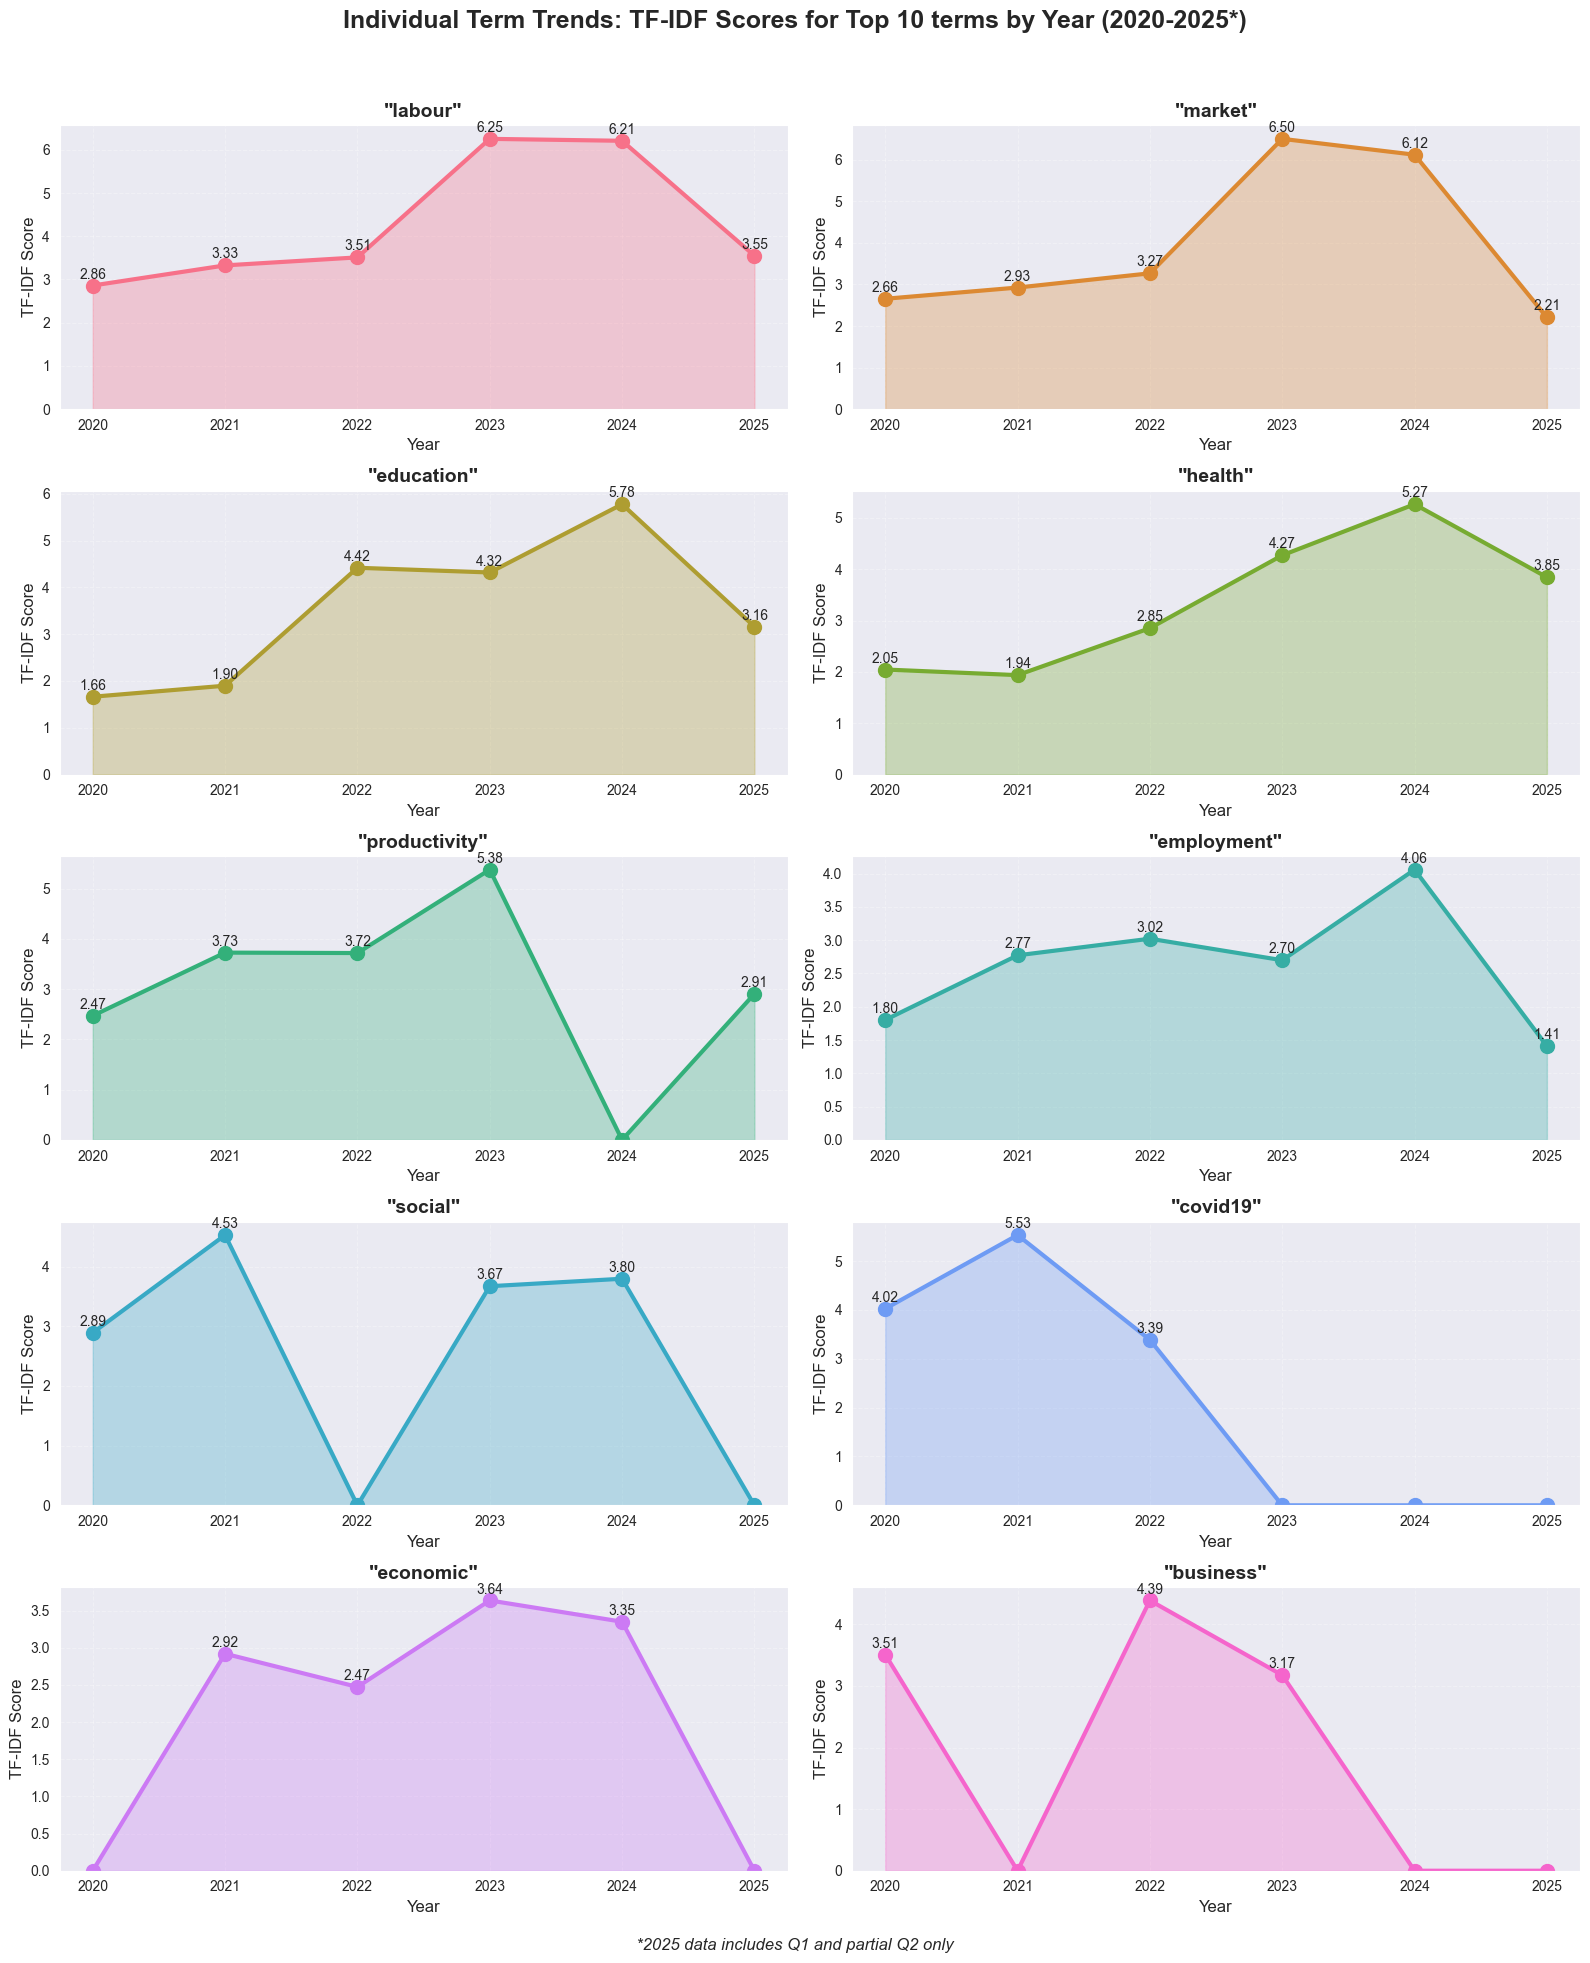

In [ ]:
def top_tfidf_dict(docs, n=20):
    vectorizer = TfidfVectorizer(stop_words=list(custom_stopwords))
    X = vectorizer.fit_transform(docs)
    scores = X.sum(axis=0).A1
    terms = vectorizer.get_feature_names_out()
    sorted_terms = sorted(zip(terms, scores), key=lambda x: x[1], reverse=True)
    return dict(sorted_terms[:n])

# Filter data - exclude 2019, include 2020-2025
df_filtered = df[df['Accreditation Date Year'] >= 2020]

tfidf_dict_by_year = {}
for year, group in df_filtered.groupby('Accreditation Date Year'):
    tfidf_dict_by_year[year] = top_tfidf_dict(group['processed_titles'])
    
    # Get raw TF-IDF scores
    raw_scores = top_tfidf_dict(group['processed_titles'])
    

# Print number of documents per year
print("Documents per year:")
for year in sorted(docs_per_year.keys()):
    print(f"{year}: {docs_per_year[year]} projects")
    
print(f"\nNote: 2025 data is partial (Q1 and early Q2 only)")

# Get all unique terms across all years
all_terms = set()
for year_dict in tfidf_dict_by_year.values():
    all_terms.update(year_dict.keys())

# Find top 10 terms by total TF-IDF score across all years
term_totals = {}
for term in all_terms:
    total = sum(year_dict.get(term, 0) for year_dict in tfidf_dict_by_year.values())
    term_totals[term] = total

top_10_terms = sorted(term_totals.items(), key=lambda x: x[1], reverse=True)[:10]
top_10_term_names = [term for term, _ in top_10_terms]

# Create DataFrame for plotting
years = sorted(tfidf_dict_by_year.keys())
data_for_plot = []

for term in top_10_term_names:
    for year in years:
        score = tfidf_dict_by_year[year].get(term, 0)
        data_for_plot.append({
            'Year': year,
            'Term': term,
            'TF-IDF Score': score
        })

plot_df = pd.DataFrame(data_for_plot)

colors = sns.color_palette("husl", 10)

# Create individual subplots for each term
fig, axes = plt.subplots(5, 2, figsize=(16, 20))
axes = axes.flatten()

for i, term in enumerate(top_10_term_names):
    ax = axes[i]
    term_data = plot_df[plot_df['Term'] == term]
    
    ax.plot(term_data['Year'], term_data['TF-IDF Score'], 
            marker='o', linewidth=3, markersize=10,
            color=colors[i])
    
    # Fill area under the line
    ax.fill_between(term_data['Year'], term_data['TF-IDF Score'], 
                    alpha=0.3, color=colors[i])
    
    # Add value labels
    for x, y in zip(term_data['Year'], term_data['TF-IDF Score']):
        if y > 0:
            ax.annotate(f'{y:.2f}', (x, y), 
                       textcoords="offset points", xytext=(0,5), 
                       ha='center', fontsize=10)
    
    ax.set_title(f'"{term}"', fontsize=14, fontweight='bold')
    ax.set_xlabel('Year', fontsize=12)
    ax.set_ylabel('TF-IDF Score', fontsize=12)
    ax.grid(True, alpha=0.3, linestyle='--')
    
    # Set y-axis to start at 0
    ax.set_ylim(bottom=0)

# Add main title with extra padding
fig.suptitle('Individual Term Trends: TF-IDF Scores for Top 10 terms by Year (2020-2025*)', 
             fontsize=18, fontweight='bold', y=0.98)

# Add footnote about 2025 data
plt.figtext(0.5, 0.01, '*2025 data includes Q1 and partial Q2 only', 
            ha='center', fontsize=12, style='italic')

# Adjust layout with extra top padding
plt.tight_layout(rect=[0, 0.02, 1, 0.96])
plt.show()



- Some terms like 'labour', 'market', 'employment' and 'productivity' reasonably consistent over time 
- Others like 'health' and 'education' steadily growing (presumably tracking growth in datasets containing information in these domains accessible through the DEA)
- Appearance of other terms like 'buisness' and 'covid19' have fallen in project titles in recent years

## Possible next steps
- N-gram analysis to find commonly co-occuring terms
- Dynamic topic modelling using gensim's Dynamic Topic Model or BERTopic

- How do topic trends align with government priorities?